# HEAD

In [1]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:

link = 'https://github.com/amarindraa/loan/raw/main/Training%20Data.csv'
#link = "Training Data.csv"
df = pd.read_csv(link)

new_column_names = ['id', 'income', 'age', 'experience', 'married_single',
                    'house_ownership', 'car_ownership', 'profession', 'city',
                    'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag']
df.columns = new_column_names

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married_single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


id   income  age  experience married_single house_ownership car_ownership           profession  \
0   1  1303834   23           3         single          rented            no  Mechanical_engineer   
1   2  7574516   40          10         single          rented            no   Software_Developer   
2   3  3991815   66           4        married          rented            no     Technical_writer   
3   4  6256451   41           2         single          rented           yes   Software_Developer   
4   5  5768871   47          11         single          rented            no        Civil_servant   

                  city           state  current_job_yrs  current_house_yrs  risk_flag  
0                 Rewa  Madhya_Pradesh                3                 13          0  
1             Parbhani     Maharashtra                9                 13          0  
2            Alappuzha          Kerala                4                 10          0  
3          Bhubaneswar          Odisha                2                 12          1  
4  Tiruchirappalli[10]      Tamil_Nadu                3                 14          1

# EDA

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

id   income  age  experience married_single house_ownership car_ownership           profession  \
0   1  1303834   23           3         single          rented            no  Mechanical_engineer   
1   2  7574516   40          10         single          rented            no   Software_Developer   
2   3  3991815   66           4        married          rented            no     Technical_writer   
3   4  6256451   41           2         single          rented           yes   Software_Developer   
4   5  5768871   47          11         single          rented            no        Civil_servant   

                  city           state  current_job_yrs  current_house_yrs  risk_flag  
0                 Rewa  Madhya_Pradesh                3                 13          0  
1             Parbhani     Maharashtra                9                 13          0  
2            Alappuzha          Kerala                4                 10          0  
3          Bhubaneswar          Odisha                2                 12          1  
4  Tiruchirappalli[10]      Tamil_Nadu                3                 14          1

In [5]:
numeric = df.select_dtypes(["int", "float"]).columns

for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

id: 252000 uniqueness variable
income: 41920 uniqueness variable
age: 59 uniqueness variable
experience: 21 uniqueness variable
current_job_yrs: 15 uniqueness variable
current_house_yrs: 5 uniqueness variable
risk_flag: 2 uniqueness variable


In [6]:
# Get the number of missing data points per column
df.isnull().sum()


id                   0
income               0
age                  0
experience           0
married_single       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

In [7]:
df.profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [8]:
df.city.unique()
df.city.nunique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

317

In [9]:
df.state.unique()
df.state.nunique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

29

In [10]:
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [11]:
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

# Cleaning

In [12]:
df.city = df.city.str.extract("([A-Za-z]+)")
print(df.city.unique())
print(f'Total:', df.city.nunique(),'City')

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar' 'Hajipur' 'Adoni' 'Erode'
 'Kollam' 'Madurai' 'Anantapuram' 'Kamarhati' 'Bhusawal' 'Sirsa'
 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer' 'Ongole' 'Miryalaguda'
 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga' 'Chennai' 'Gulbarga'
 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi' 'Howrah'
 'Aurangabad' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar' 'Bellary'
 'Danapur' 'Purnia' 'Bijapur' 'Patiala' 'Malda' 'Sagar' 'Durgapur'
 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur' 'Naihati'
 'North' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda' 'Nadiad' 'Kanpur'
 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar' 'Kottayam'
 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru' 'Ulhasnagar'
 'Aligarh' 'South' 'Berhampore' 'Gandhinagar' 'Sonipat' 'Muzaffarpur'
 'Raichur' 'Rajpur' 'Ambarnath' 'Katihar' 'Kozhikode' 'Vellore' 'Malegaon'
 'Kochi' 'Nagaon' 'Nagpur' 'Srina

In [13]:
df.state = df.state.str.extract("([A-Za-z]+)")
print(df.state.unique())
print(f'Total:', df.state.nunique(),'State')

['Madhya' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil' 'Gujarat' 'Rajasthan'
 'Telangana' 'Bihar' 'Andhra' 'West' 'Haryana' 'Puducherry' 'Karnataka'
 'Uttar' 'Himachal' 'Punjab' 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram'
 'Assam' 'Jammu' 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']
Total: 28 State


### Correction

In [14]:
df['state'] = df['state'].replace('West', 'West_Bengal')
df['state'] = df['state'].replace('Uttar', 'Uttar_Pradesh')
df['state'] = df['state'].replace('Tamil', 'Tamil_Nadu')
df['state'] = df['state'].replace('Madhya', 'Madhya_Pradesh')
df['state'] = df['state'].replace('Jammu', 'Jammu_and_Kashmir')
df['state'] = df['state'].replace('Himachal', 'Himachal_Pradesh')
df['state'] = df['state'].replace('Andhra', 'Andhra_Pradesh')


print(df.state.unique())
print(df.state.nunique(),f'States')

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']
28 States


## Features Engineering 1

### Segmentasi pada kolom Experience, Age, Income & Current Job Years

In [15]:
# Experience Categorical
conditions = [
    df['experience'] <= 5,
    (df['experience'] > 5) & (df['experience'] <= 10),
    (df['experience'] > 10) & (df['experience'] <= 15)
]

choices = ['0-5', '06-10', '11-15']

df['experience_cat'] = np.select(conditions, choices, default='>15')


# Age Categorical
conditions = [
    df['age'] <= 35,
    (df['age'] > 35) & (df['age'] <= 50),
    (df['age'] > 50) & (df['age'] <= 65)
]

choices = ['21-35', '36-49', '50-64']

df['age_cat'] = np.select(conditions, choices, default='65-79')



# income categorical
conditions = [
    df['income'] <= 2500000,
    (df['income'] > 2500000) & (df['income'] <= 5000000),
    (df['income'] > 5000000) & (df['income'] <= 7500000)
]

choices = ['a.<2,5m', 'b.2,5m - 5m', 'c.5m - 7,5m']

df['income_cat'] = np.select(conditions, choices, default='d.>7,5m')


# job duration
conditions = [
    df['current_job_yrs'] <= 3,
    (df['current_job_yrs'] > 3) & (df['current_job_yrs'] <= 6),
    (df['current_job_yrs'] > 6) & (df['current_job_yrs'] <= 9),
    (df['current_job_yrs'] > 9) & (df['current_job_yrs'] <= 14)
]

choices = ['0-3', '4-6', '7-9', '10-14']

df['job_duration_cat'] = np.select(conditions, choices, default='>14')

#### Exploratory on Age, Experience and Current Job Years

In [16]:
df[(df['age'] == 21) & (df['experience'] > 1)].sort_values(by='experience', ascending=False).head()
df[(df['age'] == 21) & (df['experience'] > 1)]['profession'].value_counts().head()

id   income  age  experience married_single house_ownership car_ownership  \
127649  127650  7110801   21          20         single          rented           yes   
41173    41174  7110801   21          20         single          rented           yes   
114342  114343  9789626   21          20         single          rented            no   
38669    38670  9789626   21          20         single          rented            no   
54906    54907  9789626   21          20         single          rented            no   

            profession       city         state  current_job_yrs  current_house_yrs  risk_flag  \
127649  Microbiologist       Durg  Chhattisgarh                9                 11          0   
41173   Microbiologist       Durg  Chhattisgarh                9                 11          0   
114342       Economist  Jehanabad         Bihar                4                 13          1   
38669        Economist  Jehanabad         Bihar                4                 13          1   
54906        Economist  Jehanabad         Bihar                4                 13          1   

       experience_cat age_cat   income_cat job_duration_cat  
127649            >15   21-35  c.5m - 7,5m              7-9  
41173             >15   21-35  c.5m - 7,5m              7-9  
114342            >15   21-35      d.>7,5m              4-6  
38669             >15   21-35      d.>7,5m              4-6  
54906             >15   21-35      d.>7,5m              4-6

Computer_hardware_engineer    162
Designer                      159
Technology_specialist         156
Petroleum_Engineer            153
Official                      152
Name: profession, dtype: int64

In [17]:
age_exp = df.groupby(['age_cat', 'experience_cat']).size().reset_index(name='total on experience') # groupby 1
age_exp['total on age_cat class'] = age_exp.groupby('age_cat')['total on experience'].transform('sum') # age_cat_total

# Calculate counts for each combination of 'age_cat' and 'experience_cat' in risk1
# npl_counts = risk1.groupby(['age_cat', 'experience_cat']).size().reset_index(name='total npl per class')

# Merge the npl_counts with age_exp based on 'age_cat' and 'experience_cat'
#age_exp = pd.merge(age_exp, npl_counts, on=['age_cat', 'experience_cat'], how='left')

# Calculate the percentage ratio
#age_exp['%npl_ratio'] = round(100 * (age_exp['total npl per class'] / age_exp['total on age_cat class']), 2)

age_exp['%Ratio'] = 100 * (age_exp['total on experience'] / age_exp['total on age_cat class'])
age_exp

df[df['age_cat'] == '21-35'].shape[0]

age_cat experience_cat  total on experience  total on age_cat class  %Ratio
0    21-35            0-5                18646                   65726  28.369
1    21-35          06-10                15796                   65726  24.033
2    21-35          11-15                14964                   65726  22.767
3    21-35            >15                16320                   65726  24.830
4    36-49            0-5                17615                   62922  27.995
5    36-49          06-10                15097                   62922  23.993
6    36-49          11-15                15675                   62922  24.912
7    36-49            >15                14535                   62922  23.100
8    50-64            0-5                16705                   63129  26.462
9    50-64          06-10                15698                   63129  24.867
10   50-64          11-15                15630                   63129  24.759
11   50-64            >15                15096                   63129  23.913
12   65-79            0-5                17056                   60223  28.321
13   65-79          06-10                14588                   60223  24.223
14   65-79          11-15                14055                   60223  23.338
15   65-79            >15                14524                   60223  24.117

65726

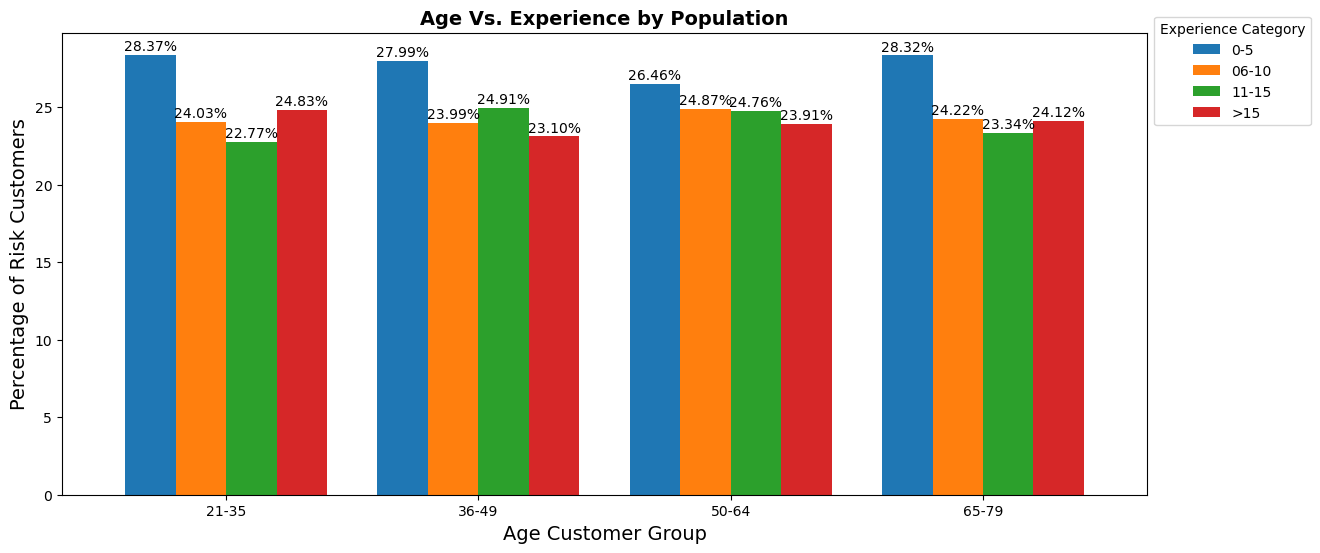

In [18]:
# Pivot the DataFrame for better plotting
pivot_age_exp = age_exp.pivot(index='age_cat', columns='experience_cat', values='total on experience')

# Calculate percentages for each age category
pivot_age_exp_percentage = pivot_age_exp.div(pivot_age_exp.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = pivot_age_exp_percentage.plot(kind='bar', stacked=False, figsize=(14, 6), width=0.8)

plt.xlabel('Age Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Age Vs. Experience by Population', fontweight="bold", fontsize=14)

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height + 0.1), ha='center', va='bottom', fontsize=10)

plt.legend(title='Experience Category', bbox_to_anchor=(1, 1.05))
plt.show();

In [19]:
pivot_age_exp
pivot_age_exp_percentage

experience_cat    0-5  06-10  11-15    >15
age_cat                                   
21-35           18646  15796  14964  16320
36-49           17615  15097  15675  14535
50-64           16705  15698  15630  15096
65-79           17056  14588  14055  14524

experience_cat    0-5  06-10  11-15    >15
age_cat                                   
21-35          28.369 24.033 22.767 24.830
36-49          27.995 23.993 24.912 23.100
50-64          26.462 24.867 24.759 23.913
65-79          28.321 24.223 23.338 24.117

In [20]:
df[(df['age'] == 21) & (df['experience'] > 1)].describe()
print(f'Total data dirty :',df[(df['age'] == 21) & (df['experience'] > 1)].shape[0])
print(f'Persentase data dirty :', round(100 * (df[(df['age'] == 21) & (df['experience'] > 1)].shape[0] / df.shape[0]),2),'%')

id      income      age  experience  current_job_yrs  current_house_yrs  risk_flag
count   3859.000    3859.000 3859.000    3859.000         3859.000           3859.000   3859.000
mean  127157.719 4881976.083   21.000      10.232            6.784             12.097      0.120
std    73238.459 2657437.544    0.000       5.365            3.302              1.283      0.325
min       33.000   12766.000   21.000       2.000            2.000             10.000      0.000
25%    64214.500 2899705.000   21.000       6.000            4.000             11.000      0.000
50%   127650.000 4813985.000   21.000      10.000            6.000             12.000      0.000
75%   190416.000 6767468.000   21.000      15.000            9.000             13.000      0.000
max   251858.000 9933806.000   21.000      20.000           14.000             14.000      1.000

Total data dirty : 3859
Persentase data dirty : 1.53 %


In [21]:
df_dirty = df.copy()
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married_single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
 13  experience_cat     252000 non-null  object
 14  age_cat            252000 non-null  object
 15  income_cat         252000 non-null  object
 16  job_duration_cat   2

252000

#### Data Dirty Eliminated

In [22]:
drop21 = df[(df['age'] <= 21) & (df['experience'] >= 3)].index
df = df.drop(drop21)

drop22 = df[(df['age'] <= 22) & (df['experience'] >= 3)].index
df = df.drop(drop22)

drop23 = df[(df['age'] <= 23) & (df['experience'] >= 4)].index
df = df.drop(drop23)

drop24 = df[(df['age'] <= 24) & (df['experience'] >= 5)].index
df = df.drop(drop24)

In [23]:
df.head()

id   income  age  experience married_single house_ownership car_ownership           profession  \
0   1  1303834   23           3         single          rented            no  Mechanical_engineer   
1   2  7574516   40          10         single          rented            no   Software_Developer   
2   3  3991815   66           4        married          rented            no     Technical_writer   
3   4  6256451   41           2         single          rented           yes   Software_Developer   
4   5  5768871   47          11         single          rented            no        Civil_servant   

              city           state  current_job_yrs  current_house_yrs  risk_flag experience_cat  \
0             Rewa  Madhya_Pradesh                3                 13          0            0-5   
1         Parbhani     Maharashtra                9                 13          0          06-10   
2        Alappuzha          Kerala                4                 10          0            0-5   
3      Bhubaneswar          Odisha                2                 12          1            0-5   
4  Tiruchirappalli      Tamil_Nadu                3                 14          1          11-15   

  age_cat   income_cat job_duration_cat  
0   21-35      a.<2,5m              0-3  
1   36-49      d.>7,5m              7-9  
2   65-79  b.2,5m - 5m              4-6  
3   36-49  c.5m - 7,5m              0-3  
4   36-49  c.5m - 7,5m              0-3

In [24]:
# drop2134 = df[(df['age_cat'] == '21-35') & (df['experience'] > df['current_job_yrs'] )].index
# df = df.drop(drop2134)

In [25]:
df[(df['age_cat'] == '21-35') & (df['experience'] < df['current_job_yrs'] )]

Empty DataFrame
Columns: [id, income, age, experience, married_single, house_ownership, car_ownership, profession, city, state, current_job_yrs, current_house_yrs, risk_flag, experience_cat, age_cat, income_cat, job_duration_cat]
Index: []

In [26]:
df.reset_index(drop=True).head()

id   income  age  experience married_single house_ownership car_ownership           profession  \
0   1  1303834   23           3         single          rented            no  Mechanical_engineer   
1   2  7574516   40          10         single          rented            no   Software_Developer   
2   3  3991815   66           4        married          rented            no     Technical_writer   
3   4  6256451   41           2         single          rented           yes   Software_Developer   
4   5  5768871   47          11         single          rented            no        Civil_servant   

              city           state  current_job_yrs  current_house_yrs  risk_flag experience_cat  \
0             Rewa  Madhya_Pradesh                3                 13          0            0-5   
1         Parbhani     Maharashtra                9                 13          0          06-10   
2        Alappuzha          Kerala                4                 10          0            0-5   
3      Bhubaneswar          Odisha                2                 12          1            0-5   
4  Tiruchirappalli      Tamil_Nadu                3                 14          1          11-15   

  age_cat   income_cat job_duration_cat  
0   21-35      a.<2,5m              0-3  
1   36-49      d.>7,5m              7-9  
2   65-79  b.2,5m - 5m              4-6  
3   36-49  c.5m - 7,5m              0-3  
4   36-49  c.5m - 7,5m              0-3

In [27]:
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237925 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 237925 non-null  int64 
 1   income             237925 non-null  int64 
 2   age                237925 non-null  int64 
 3   experience         237925 non-null  int64 
 4   married_single     237925 non-null  object
 5   house_ownership    237925 non-null  object
 6   car_ownership      237925 non-null  object
 7   profession         237925 non-null  object
 8   city               237925 non-null  object
 9   state              237925 non-null  object
 10  current_job_yrs    237925 non-null  int64 
 11  current_house_yrs  237925 non-null  int64 
 12  risk_flag          237925 non-null  int64 
 13  experience_cat     237925 non-null  object
 14  age_cat            237925 non-null  object
 15  income_cat         237925 non-null  object
 16  job_duration_cat   2

237925

In [28]:
df[df['experience'] < df['current_job_yrs']].shape[0]
df[df['experience'] != df['current_job_yrs']].shape[0]
df[df['experience'] == df['current_job_yrs']].shape[0]

df[df['experience'] != df['current_job_yrs']].shape[0] + df[df['experience'] == df['current_job_yrs']].shape[0]

0

128308

109617

237925

In [29]:
print(f'Total Remaining Database Used:', round(100 * (df.shape[0] / df_dirty.shape[0]),2),'%',)
print(f'from :', df_dirty.shape[0])
print(f'dropped :', df_dirty.shape[0] - df.shape[0],'or',round(100 * (df_dirty.shape[0] - df.shape[0])/df_dirty.shape[0],2),'% from origin')
print(f'remaining data to process:', df.shape[0])

Total Remaining Database Used: 94.41 %
from : 252000
dropped : 14075 or 5.59 % from origin
remaining data to process: 237925


In [30]:
df_clean = df.copy()

### Segmentasi by Zone

In [31]:
df_clean2 = df.copy()

In [32]:
def segment_state(state):
    if state in ['Chhattisgarh', 'Madhya_Pradesh']:
        return 'Central Zone'

    elif state in ['Bihar', 'Odisha', 'West_Bengal']:
        return 'East Zone'

    elif state in ['Chandigarh', 'Himachal_Pradesh', 'Jammu_and_Kashmir']:
        return 'North Zone'

    elif state in ['Delhi', 'Haryana', 'Uttar_Pradesh']:
        return 'North Central Zone'

    elif state in ['Assam', 'Jharkhand','Manipur', 'Mizoram', 'Sikkim',
                  'Tripura']:
        return 'North East Zone'

    elif state in ['Punjab', 'Rajasthan', 'Uttarakhand']:
        return 'North West Zone'

    elif state in ['Tamil_Nadu']:
        return 'South Zone'

    elif state in ['Telangana']:
        return 'South Zone'

    elif state in ['Andhra_Pradesh', 'Puducherry']:
        return 'South East Zone'

    elif state in ['Karnataka', 'Kerala']:
        return 'South West Zone'

    elif state in ['Gujarat', 'Maharashtra']:
        return 'West Zone'
    else:
        return 'Unknown'

In [33]:
#apply the function to the column to segment the profession
df_clean2['segment_state'] = df_clean2['state'].apply(segment_state)

In [34]:
df_clean2[df_clean2['segment_state'] == 'Unknown'].value_counts()

Series([], dtype: int64)

In [35]:
df_clean2

id   income  age  experience married_single house_ownership car_ownership  \
0            1  1303834   23           3         single          rented            no   
1            2  7574516   40          10         single          rented            no   
2            3  3991815   66           4        married          rented            no   
3            4  6256451   41           2         single          rented           yes   
4            5  5768871   47          11         single          rented            no   
...        ...      ...  ...         ...            ...             ...           ...   
251995  251996  8154883   43          13         single          rented            no   
251996  251997  2843572   26          10         single          rented            no   
251997  251998  4522448   46           7         single          rented            no   
251998  251999  6507128   45           0         single          rented            no   
251999  252000  9070230   70          17         single          rented            no   

                 profession             city           state  current_job_yrs  current_house_yrs  \
0       Mechanical_engineer             Rewa  Madhya_Pradesh                3                 13   
1        Software_Developer         Parbhani     Maharashtra                9                 13   
2          Technical_writer        Alappuzha          Kerala                4                 10   
3        Software_Developer      Bhubaneswar          Odisha                2                 12   
4             Civil_servant  Tiruchirappalli      Tamil_Nadu                3                 14   
...                     ...              ...             ...              ...                ...   
251995              Surgeon          Kolkata     West_Bengal                6                 11   
251996         Army_officer             Rewa  Madhya_Pradesh                6                 11   
251997      Design_Engineer           Kalyan     Maharashtra                7                 12   
251998     Graphic_Designer      Pondicherry      Puducherry                0                 10   
251999         Statistician            Avadi      Tamil_Nadu                7                 11   

        risk_flag experience_cat age_cat   income_cat job_duration_cat    segment_state  
0               0            0-5   21-35      a.<2,5m              0-3     Central Zone  
1               0          06-10   36-49      d.>7,5m              7-9        West Zone  
2               0            0-5   65-79  b.2,5m - 5m              4-6  South West Zone  
3               1            0-5   36-49  c.5m - 7,5m              0-3        East Zone  
4               1          11-15   36-49  c.5m - 7,5m              0-3       South Zone  
...           ...            ...     ...          ...              ...              ...  
251995          0          11-15   36-49      d.>7,5m              4-6        East Zone  
251996          0          06-10   21-35  b.2,5m - 5m              4-6     Central Zone  
251997          0          06-10   36-49  b.2,5m - 5m              7-9        West Zone  
251998          0            0-5   36-49  c.5m - 7,5m              0-3  South East Zone  
251999          0            >15   65-79      d.>7,5m              7-9       South Zone  

[237925 rows x 18 columns]

### Segmentasi by Profession

In [36]:
def segment_profession(profession):
    if profession in ['Engineer','Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Architect', 'Industrial_Engineer', 'Technology_specialist','Drafter', 'Technician']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Official', 'Army_officer', 'Firefighter']:
        return 'Government'
    elif profession in ['Police_officer', 'Magistrate', 'Lawyer']:
        return 'Law Enforcement'
    elif profession in ['Chartered_Accountant', 'Economist', 'Financial_Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical Practitioner'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession in ['Comedian', 'Artist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator','Librarian']:
        return 'Administration'
    elif profession in ['Analyst', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician', 'Psychologist','Surveyor']:
        return 'Science/Research'
    elif profession in ['Consultant']:
        return 'Consultant'
    else:
        return 'Others'

In [37]:
df_clean2['segment_profession'] = df_clean2['profession'].apply(segment_profession)

In [38]:
df_clean2[df_clean2['segment_profession'] == 'Other']['profession'].value_counts()

Series([], Name: profession, dtype: int64)

In [39]:
df_clean2

id   income  age  experience married_single house_ownership car_ownership  \
0            1  1303834   23           3         single          rented            no   
1            2  7574516   40          10         single          rented            no   
2            3  3991815   66           4        married          rented            no   
3            4  6256451   41           2         single          rented           yes   
4            5  5768871   47          11         single          rented            no   
...        ...      ...  ...         ...            ...             ...           ...   
251995  251996  8154883   43          13         single          rented            no   
251996  251997  2843572   26          10         single          rented            no   
251997  251998  4522448   46           7         single          rented            no   
251998  251999  6507128   45           0         single          rented            no   
251999  252000  9070230   70          17         single          rented            no   

                 profession             city           state  current_job_yrs  current_house_yrs  \
0       Mechanical_engineer             Rewa  Madhya_Pradesh                3                 13   
1        Software_Developer         Parbhani     Maharashtra                9                 13   
2          Technical_writer        Alappuzha          Kerala                4                 10   
3        Software_Developer      Bhubaneswar          Odisha                2                 12   
4             Civil_servant  Tiruchirappalli      Tamil_Nadu                3                 14   
...                     ...              ...             ...              ...                ...   
251995              Surgeon          Kolkata     West_Bengal                6                 11   
251996         Army_officer             Rewa  Madhya_Pradesh                6                 11   
251997      Design_Engineer           Kalyan     Maharashtra                7                 12   
251998     Graphic_Designer      Pondicherry      Puducherry                0                 10   
251999         Statistician            Avadi      Tamil_Nadu                7                 11   

        risk_flag experience_cat age_cat   income_cat job_duration_cat    segment_state  \
0               0            0-5   21-35      a.<2,5m              0-3     Central Zone   
1               0          06-10   36-49      d.>7,5m              7-9        West Zone   
2               0            0-5   65-79  b.2,5m - 5m              4-6  South West Zone   
3               1            0-5   36-49  c.5m - 7,5m              0-3        East Zone   
4               1          11-15   36-49  c.5m - 7,5m              0-3       South Zone   
...           ...            ...     ...          ...              ...              ...   
251995          0          11-15   36-49      d.>7,5m              4-6        East Zone   
251996          0          06-10   21-35  b.2,5m - 5m              4-6     Central Zone   
251997          0          06-10   36-49  b.2,5m - 5m              7-9        West Zone   
251998          0            0-5   36-49  c.5m - 7,5m              0-3  South East Zone   
251999          0            >15   65-79      d.>7,5m              7-9       South Zone   

          segment_profession  
0                Engineering  
1                IT/Software  
2                IT/Software  
3                IT/Software  
4                 Government  
...                      ...  
251995  Medical Practitioner  
251996            Government  
251997           Engineering  
251998           IT/Software  
251999      Science/Research  

[237925 rows x 19 columns]

## Descriptive Statistics

In [40]:
df.describe()

id      income        age  experience  current_job_yrs  current_house_yrs  risk_flag
count 237925.000  237925.000 237925.000  237925.000       237925.000         237925.000 237925.000
mean  125967.348 4992098.486     51.581       9.990            6.274             11.990      0.122
std    72751.146 2881978.248     16.154       6.047            3.670              1.401      0.328
min        1.000   10310.000     21.000       0.000            0.000             10.000      0.000
25%    62960.000 2485396.000     38.000       5.000            3.000             11.000      0.000
50%   125941.000 4995311.000     52.000      10.000            6.000             12.000      0.000
75%   188965.000 7477502.000     66.000      15.000            9.000             13.000      0.000
max   252000.000 9999938.000     79.000      20.000           14.000             14.000      1.000

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237925 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 237925 non-null  int64 
 1   income             237925 non-null  int64 
 2   age                237925 non-null  int64 
 3   experience         237925 non-null  int64 
 4   married_single     237925 non-null  object
 5   house_ownership    237925 non-null  object
 6   car_ownership      237925 non-null  object
 7   profession         237925 non-null  object
 8   city               237925 non-null  object
 9   state              237925 non-null  object
 10  current_job_yrs    237925 non-null  int64 
 11  current_house_yrs  237925 non-null  int64 
 12  risk_flag          237925 non-null  int64 
 13  experience_cat     237925 non-null  object
 14  age_cat            237925 non-null  object
 15  income_cat         237925 non-null  object
 16  job_duration_cat   2

In [42]:
df.describe(include=object)

married_single house_ownership car_ownership profession        city          state  \
count          237925          237925        237925     237925      237925         237925   
unique              2               3             2         51         316             28   
top            single          rented            no  Physician  Aurangabad  Uttar_Pradesh   
freq           213631          218821        166190       5604        1426          27293   

       experience_cat age_cat   income_cat job_duration_cat  
count          237925  237925       237925           237925  
unique              4       4            4                4  
top               0-5   50-64  c.5m - 7,5m              4-6  
freq            68161   63129        59835            71920

In [43]:
df.duplicated().sum()
df.isna().sum()

0

id                   0
income               0
age                  0
experience           0
married_single       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
experience_cat       0
age_cat              0
income_cat           0
job_duration_cat     0
dtype: int64

### Pemisahan Kategori

In [44]:
# Pemisahan PL dan NPL pada data entry clean
risk0 = df[df['risk_flag']==0]
risk1 = df[df['risk_flag']==1]

# List of column names containing numerical data
nums = df.select_dtypes(include='number').columns.tolist()[1:]

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

In [45]:
risk0.describe(include=object)

married_single house_ownership car_ownership    profession        city          state  \
count          208806          208806        208806        208806      208806         208806   
unique              2               3             2            51         316             28   
top            single          rented            no  Statistician  Aurangabad  Uttar_Pradesh   
freq           187086          191493        145062          4938        1291          24120   

       experience_cat age_cat   income_cat job_duration_cat  
count          208806  208806       208806           208806  
unique              4       4            4                4  
top               0-5   50-64  c.5m - 7,5m              4-6  
freq            58483   55575        52697            63563

In [46]:
risk1.describe(include=object)

married_single house_ownership car_ownership      profession   city          state  \
count           29119           29119         29119           29119  29119          29119   
unique              2               3             2              51    316             28   
top            single          rented            no  Police_officer  Kochi  Uttar_Pradesh   
freq            26545           27328         21128             815    242           3173   

       experience_cat age_cat income_cat job_duration_cat  
count           29119   29119      29119            29119  
unique              4       4          4                4  
top               0-5   50-64    a.<2,5m              0-3  
freq             9678    7554       7523             8462

In [47]:
nums # sudah tidak ada risk_flag
cats

['income',
 'age',
 'experience',
 'current_job_yrs',
 'current_house_yrs',
 'risk_flag']

['married_single',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state',
 'experience_cat',
 'age_cat',
 'income_cat',
 'job_duration_cat']

## Univariate Analysis

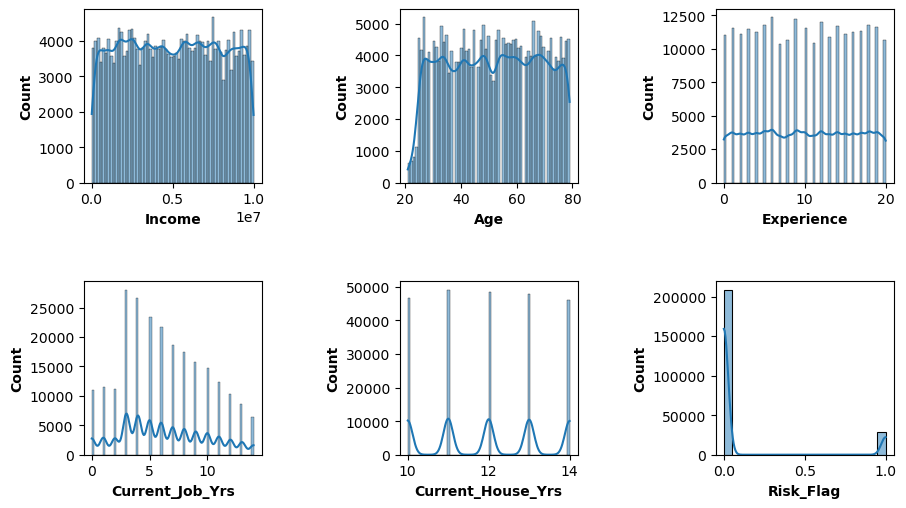

In [48]:
plt.figure(figsize=(10,6))

for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=df[nums[i]], kde=True)
    plt.yticks(fontsize=10)
    plt.ylabel('Count', fontsize=10, weight ='bold')
    plt.xlabel(nums[i].title(), fontsize=10, weight='bold')

plt.tight_layout(pad = 4)
plt.show();

<Figure size 1200x800 with 0 Axes>

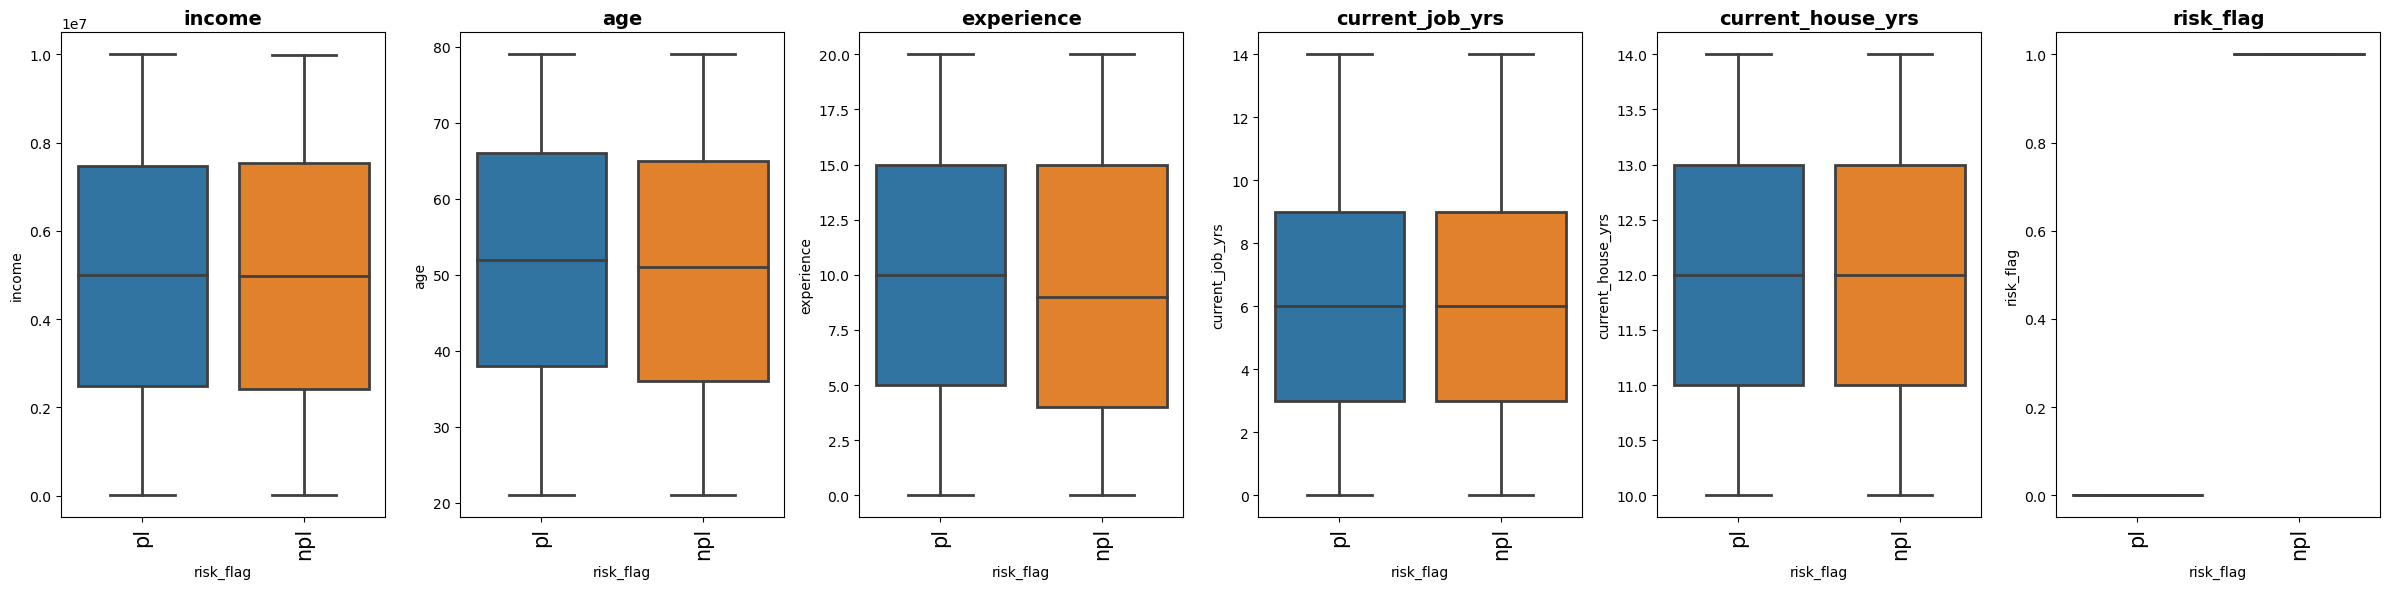

In [49]:
plt.figure(figsize=(12, 8))

# Create a single subplot with multiple columns
num_cols = len(nums)
fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 4, 6))

# Create box plots for each numerical column
for i in range(num_cols):
    sns.boxplot(data=df, y=nums[i], x='risk_flag', linewidth=2, ax=axes[i])
    axes[i].set_title(nums[i], fontsize=14, fontweight='bold')  # Set title properties

    axes[i].set_xticklabels(['pl', 'npl'], fontsize=15, rotation=90)

plt.tight_layout()  # Adjust spacing between subplots
plt.show();  # Display the box plots

### Plot Pada Categorical

#### PL & NPL on Marital Status

In [50]:
# Calculate value counts and convert to DataFrames
mon0 = pd.DataFrame(risk0['married_single'].value_counts().reset_index())
mon1 = pd.DataFrame(risk1['married_single'].value_counts().reset_index())

# Rename columns to match for merging
mon0.columns = ['House_Ownership', 'Count_PL']
mon1.columns = ['House_Ownership', 'Count_NPL']

# Merge based on the 'Car_Ownership' column
mon_df = mon0.merge(mon1, on='House_Ownership', how='inner')

mon_df['Total'] = mon_df['Count_PL'] + mon_df['Count_NPL']
mon_df['%Ratio_PL']= 100 * mon_df['Count_PL'] / mon_df['Total']
mon_df['%Ratio_NPL']= 100 * mon_df['Count_NPL'] / mon_df['Total']
# Print the merged DataFrame
mon_df


House_Ownership  Count_PL  Count_NPL   Total  %Ratio_PL  %Ratio_NPL
0          single    187086      26545  213631     87.574      12.426
1         married     21720       2574   24294     89.405      10.595

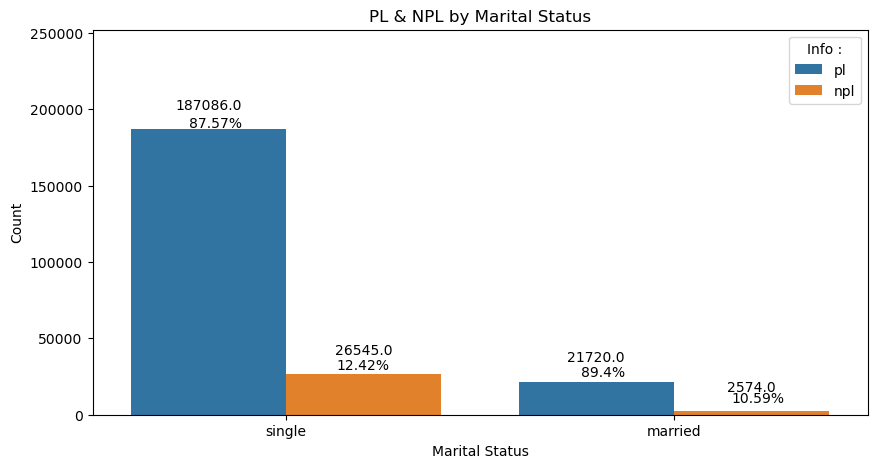

In [51]:
# Create the countplot with figsize (10, 5)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='married_single', hue='risk_flag', linewidth=2)

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 12),
                textcoords='offset points')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('PL & NPL by Marital Status')

# Change legend labels
legend_labels = ['pl', 'npl']
ax.legend(legend_labels, title='Info :')

plt.annotate(xy = (0, 150000),
             xytext = (-0.25, 188000),
             text = '87.57%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (0, 150000),
             xytext = (0.13, 30000),
             text = '12.42%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 150000),
             xytext = (1 - 0.24, 25000),
             text = '89.4%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 150000),
             xytext = (1.15, 8000),
             text = '10.59%',
             size = 10,
             color= 'black'
             )

plt.ylim(0,252000)

plt.show();

In [52]:
# Calculate value counts and convert to DataFrames
hon0 = pd.DataFrame(risk0['house_ownership'].value_counts().reset_index())
hon1 = pd.DataFrame(risk1['house_ownership'].value_counts().reset_index())

# Rename columns to match for merging
hon0.columns = ['House_Ownership', 'Count_PL']
hon1.columns = ['House_Ownership', 'Count_NPL']

# Merge based on the 'Car_Ownership' column
hon_df = hon0.merge(hon1, on='House_Ownership', how='inner')

hon_df['Total'] = hon_df['Count_PL'] + hon_df['Count_NPL']
hon_df['%Ratio_PL']= 100 * hon_df['Count_PL'] / hon_df['Total']
hon_df['%Ratio_NPL']= 100 * hon_df['Count_NPL'] / hon_df['Total']
# Print the merged DataFrame
hon_df


House_Ownership  Count_PL  Count_NPL   Total  %Ratio_PL  %Ratio_NPL
0          rented    191493      27328  218821     87.511      12.489
1           owned     11229       1113   12342     90.982       9.018
2    norent_noown      6084        678    6762     89.973      10.027

#### PL & NPL on House Ownership

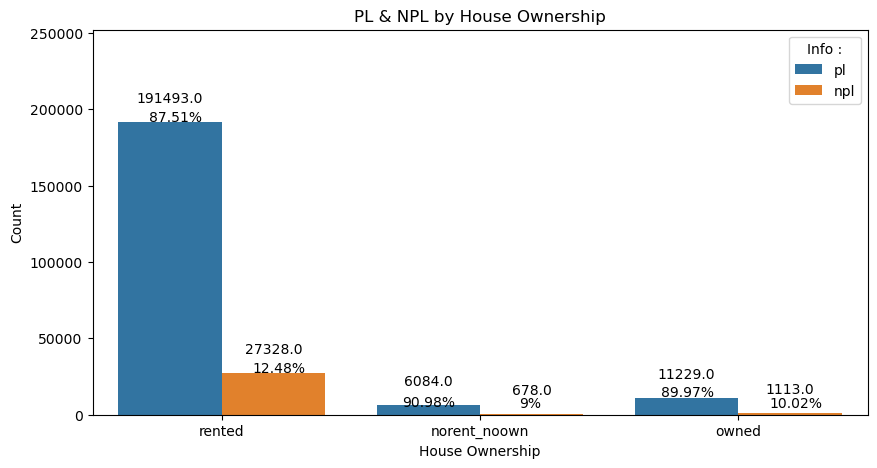

In [53]:
# Create the countplot with figsize (10, 5)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='house_ownership', hue='risk_flag', linewidth=2)

# Calculate total counts for each car ownership category
total_hos = df['house_ownership'].value_counts()

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
#    percentage = height / total_hos[p.get_y()]
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 12),
                textcoords='offset points')

plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.title('PL & NPL by House Ownership')

# Change legend labels
legend_labels = ['pl', 'npl']
ax.legend(legend_labels, title='Info :')

plt.annotate(xy = (0, 250000),
             xytext = (-0.28, 192000),
             text = '87.51%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (0, 250000),
             xytext = (0.12, 28000),
             text = '12.48%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 250000),
             xytext = (1 - 0.3, 5500),
             text = '90.98%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 250000),
             xytext = (1.15, 5000),
             text = '9%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (2, 250000),
             xytext = (2 - 0.3, 12000),
             text = '89.97%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (2, 250000),
             xytext = (2.12, 5000),
             text = '10.02%',
             size = 10,
             color= 'black'
             )

plt.ylim(0,252000)

plt.show();

In [54]:
# Calculate value counts and convert to DataFrames
con0 = pd.DataFrame(risk0['car_ownership'].value_counts().reset_index())
con1 = pd.DataFrame(risk1['car_ownership'].value_counts().reset_index())

# Rename columns to match for merging
con0.columns = ['Car_Ownership', 'Count_PL']
con1.columns = ['Car_Ownership', 'Count_NPL']

# Merge based on the 'Car_Ownership' column
con_df = con0.merge(con1, on='Car_Ownership', how='inner')

con_df['Total'] = con_df['Count_PL'] + con_df['Count_NPL']
con_df['%Ratio_PL']= 100 * con_df['Count_PL'] / con_df['Total']
con_df['%Ratio_NPL']= 100 * con_df['Count_NPL'] / con_df['Total']
# Print the merged DataFrame
con_df


Car_Ownership  Count_PL  Count_NPL   Total  %Ratio_PL  %Ratio_NPL
0            no    145062      21128  166190     87.287      12.713
1           yes     63744       7991   71735     88.860      11.140

#### PN & NPL on Car Ownership

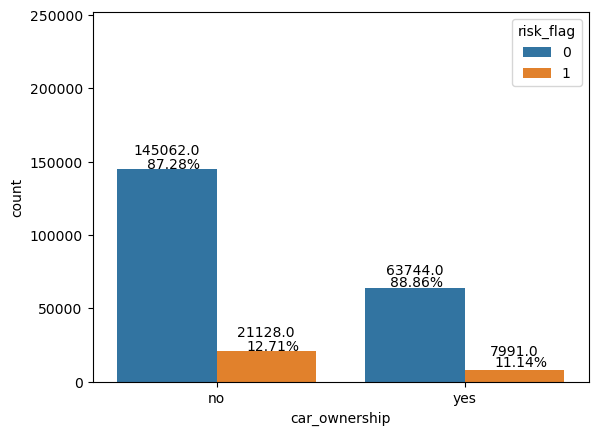

In [55]:
ax = sns.countplot(data=df, x='car_ownership', hue='risk_flag', linewidth=2)


for p in ax.patches:
    height = p.get_height()
#    percentage = height / total_cos[p.get_y()]
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.annotate(xy = (0, 150000),
             xytext = (-0.28, 145000),
             text = '87.28%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (0, 150000),
             xytext = (0.12, 21000),
             text = '12.71%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 150000),
             xytext = (1 - 0.3, 65000),
             text = '88.86%',
             size = 10,
             color= 'black'
             )

plt.annotate(xy = (1, 150000),
             xytext = (1.12, 10000),
             text = '11.14%',
             size = 10,
             color= 'black'
             )

plt.ylim(0, 252000)

plt.show();


#### PL & NPL on Profession

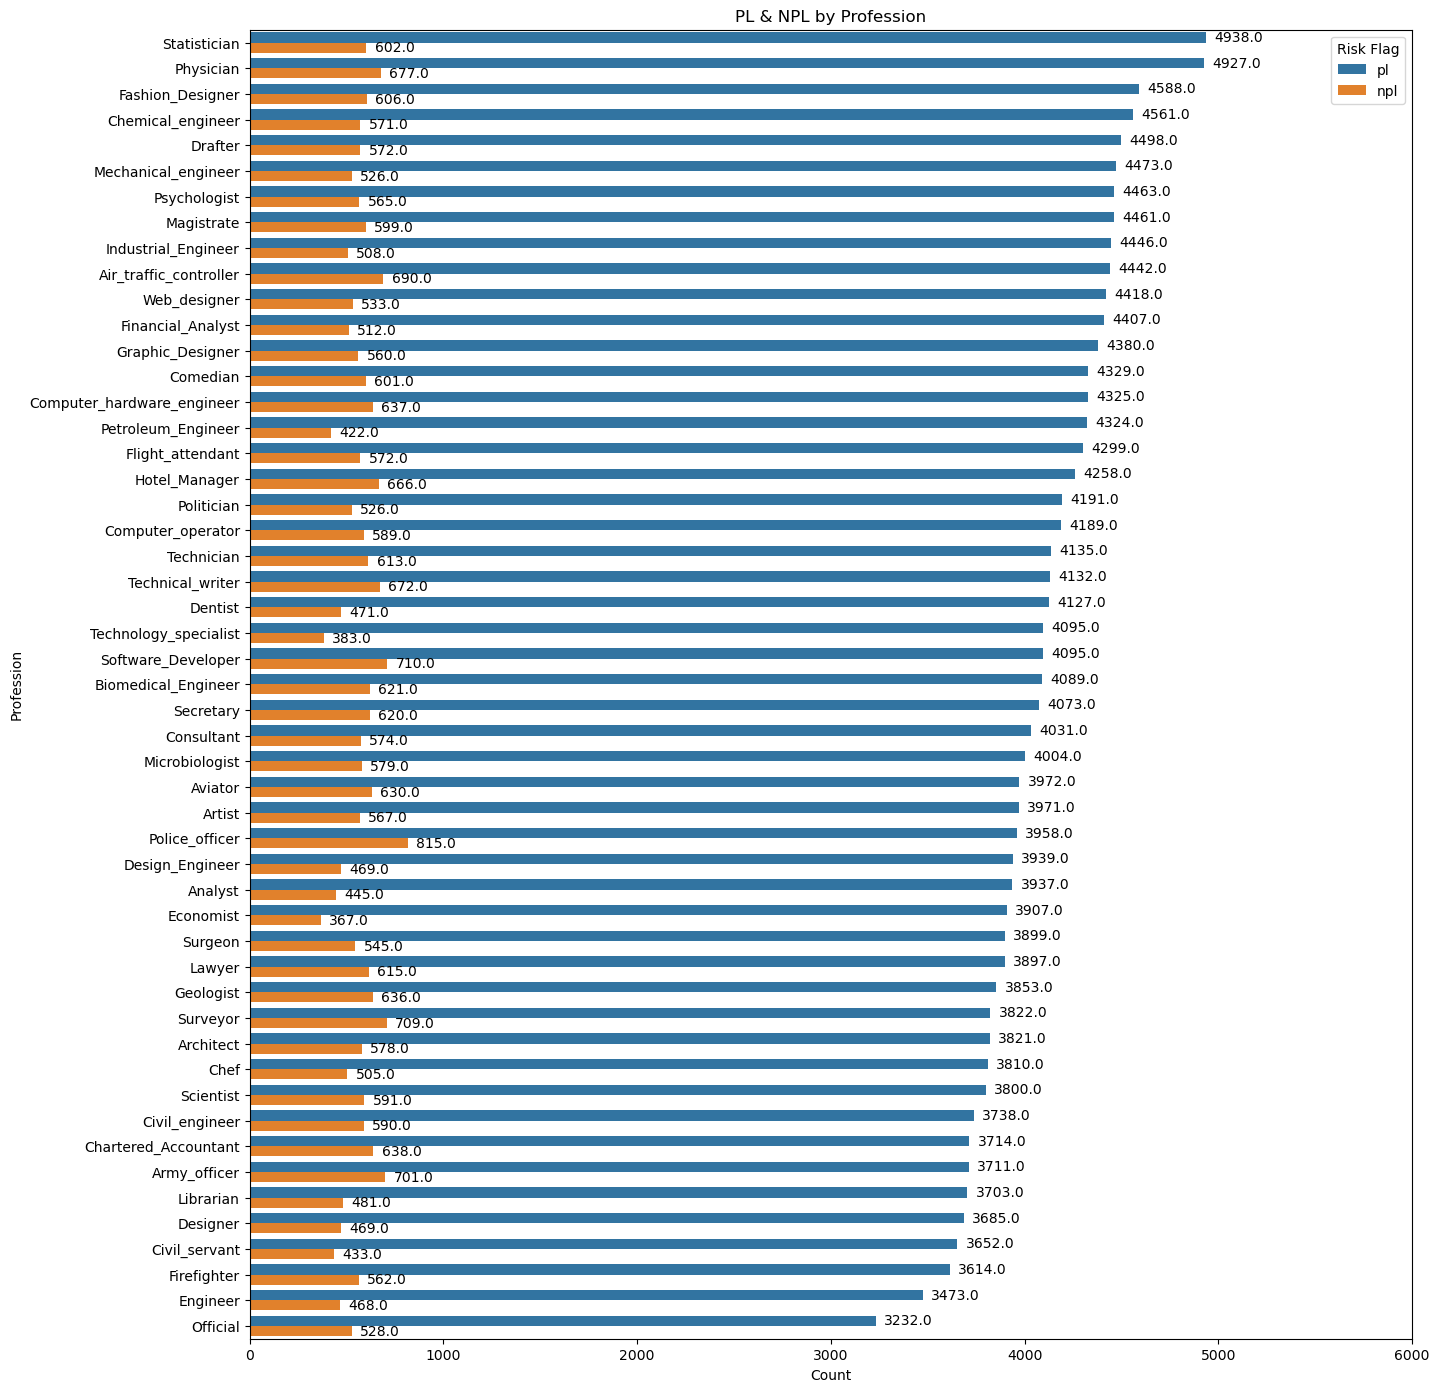

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by the count of 'pl' risk_flag values within each profession
sorted_df = df[df['risk_flag'] == 0].groupby('profession').size().reset_index(name='count')
sorted_df = sorted_df.sort_values(by='count', ascending=False)

# Create the countplot with figsize (10, 10)
plt.figure(figsize=(15, 17))
ax = sns.countplot(data=df, y='profession', hue='risk_flag', linewidth=2, order=sorted_df['profession'])

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(6, 0),
                textcoords='offset points')

plt.ylabel('Profession')
plt.xlabel('Count')
plt.title('PL & NPL by Profession')

# Change legend labels
legend_labels = ['pl', 'npl']
ax.legend(legend_labels, title='Risk Flag')

# Set x-axis limits from 0 to 7000
plt.xlim(0, 6000)

plt.show();


In [57]:
prfg = df.groupby(['profession', 'risk_flag'])['id'].nunique().reset_index()
prf1 = df.groupby('profession')['id'].nunique().reset_index()

prfg = prfg.merge(prf1, on = 'profession')
prfg = prfg.rename(columns = {'id_x' : 'id',
                            'id_y' : 'total'})

prfg['percentage'] = prfg.apply(lambda x : round((x['id'] / x['total']) * 100, 2), axis = 1)
prfg = prfg.sort_values(by = 'profession')
prfg1 = prfg[prfg['risk_flag'] == 1]

prfg1.sort_values(by = 'percentage', ascending = False).head(10)
prfg1.sort_values(by = 'percentage', ascending = True).head(10)

profession  risk_flag   id  total  percentage
77        Police_officer          1  815   4773      17.080
7           Army_officer          1  701   4412      15.890
93              Surveyor          1  709   4531      15.650
87    Software_Developer          1  710   4805      14.780
15  Chartered_Accountant          1  638   4352      14.660
53             Geologist          1  636   4489      14.170
71              Official          1  528   3760      14.040
95      Technical_writer          1  672   4804      13.990
11               Aviator          1  630   4602      13.690
61                Lawyer          1  615   4512      13.630

profession  risk_flag   id  total  percentage
99  Technology_specialist          1  383   4478       8.550
41              Economist          1  367   4274       8.590
73     Petroleum_Engineer          1  422   4746       8.890
3                 Analyst          1  445   4382      10.160
33                Dentist          1  471   4598      10.240
59    Industrial_Engineer          1  508   4954      10.250
47      Financial_Analyst          1  512   4919      10.410
67    Mechanical_engineer          1  526   4999      10.520
23          Civil_servant          1  433   4085      10.600
35        Design_Engineer          1  469   4408      10.640

#### PL NPL on Segment Profession

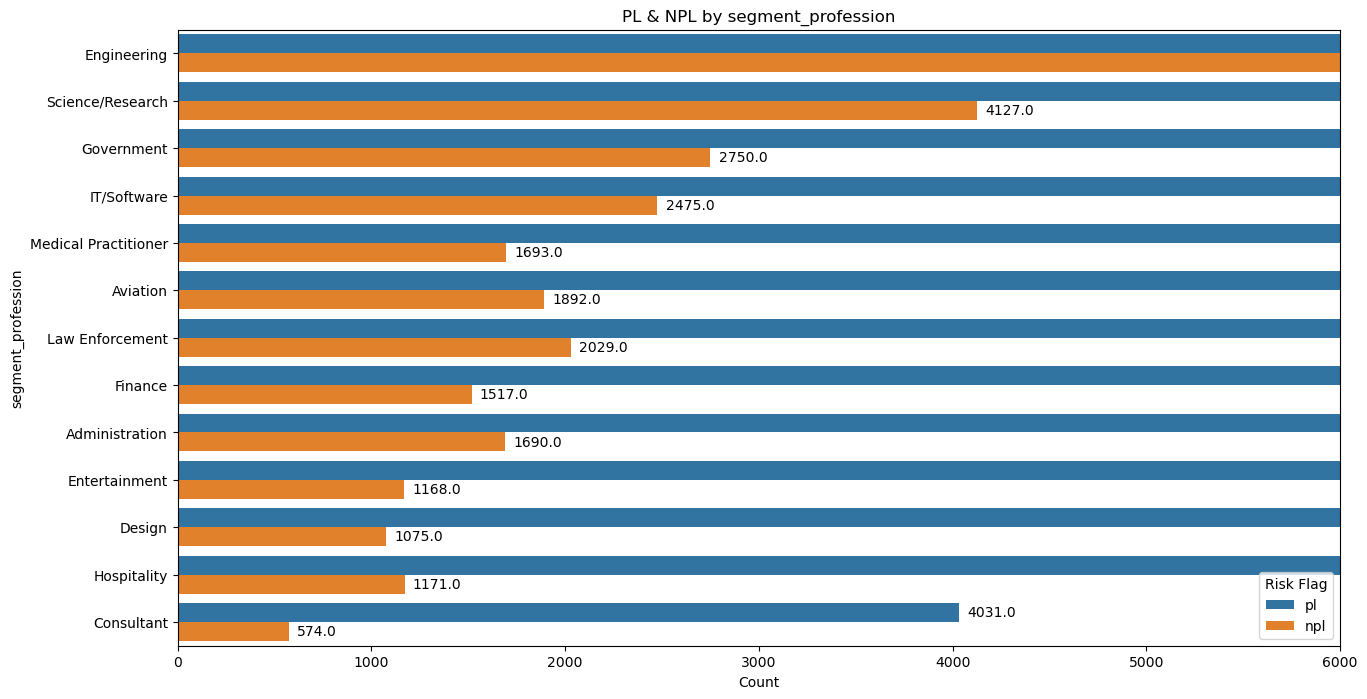

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by the count of 'pl' risk_flag values within each profession
sorted_df = df_clean2[df_clean2['risk_flag'] == 0].groupby('segment_profession').size().reset_index(name='count')
sorted_df = sorted_df.sort_values(by='count', ascending=False)

# Create the countplot with figsize (10, 10)
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_clean2, y='segment_profession', hue='risk_flag', linewidth=2, order=sorted_df['segment_profession'])

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10, color='black', xytext=(6, 0),
                textcoords='offset points')

plt.ylabel('segment_profession')
plt.xlabel('Count')
plt.title('PL & NPL by segment_profession')

# Change legend labels
legend_labels = ['pl', 'npl']
ax.legend(legend_labels, title='Risk Flag')

# Set x-axis limits from 0 to 7000
plt.xlim(0, 6000)

plt.show();


In [59]:
prfg = df_clean2.groupby(['segment_profession', 'risk_flag'])['id'].nunique().reset_index()
prf1 = df_clean2.groupby('segment_profession')['id'].nunique().reset_index()

prfg = prfg.merge(prf1, on = 'segment_profession')
prfg = prfg.rename(columns = {'id_x' : 'id',
                            'id_y' : 'total'})

prfg['percentage'] = prfg.apply(lambda x : round((x['id'] / x['total']) * 100, 2), axis = 1)
prfg = prfg.sort_values(by = 'segment_profession')
prfg1 = prfg[prfg['risk_flag'] == 1]

prfg1.sort_values(by = 'percentage', ascending = False).head(10)
prfg1.sort_values(by = 'percentage', ascending = True).head(10)

segment_profession  risk_flag    id  total  percentage
21       Law Enforcement          1  2029  14345      14.140
15            Government          1  2750  21150      13.000
3               Aviation          1  1892  14605      12.950
19           IT/Software          1  2475  19500      12.690
17           Hospitality          1  1171   9239      12.670
25      Science/Research          1  4127  32944      12.530
5             Consultant          1   574   4605      12.460
1         Administration          1  1690  13655      12.380
11         Entertainment          1  1168   9468      12.340
23  Medical Practitioner          1  1693  14646      11.560

segment_profession  risk_flag    id  total  percentage
13               Finance          1  1517  13545      11.200
9            Engineering          1  6958  60875      11.430
7                 Design          1  1075   9348      11.500
23  Medical Practitioner          1  1693  14646      11.560
11         Entertainment          1  1168   9468      12.340
1         Administration          1  1690  13655      12.380
5             Consultant          1   574   4605      12.460
25      Science/Research          1  4127  32944      12.530
17           Hospitality          1  1171   9239      12.670
19           IT/Software          1  2475  19500      12.690

### NPL by State

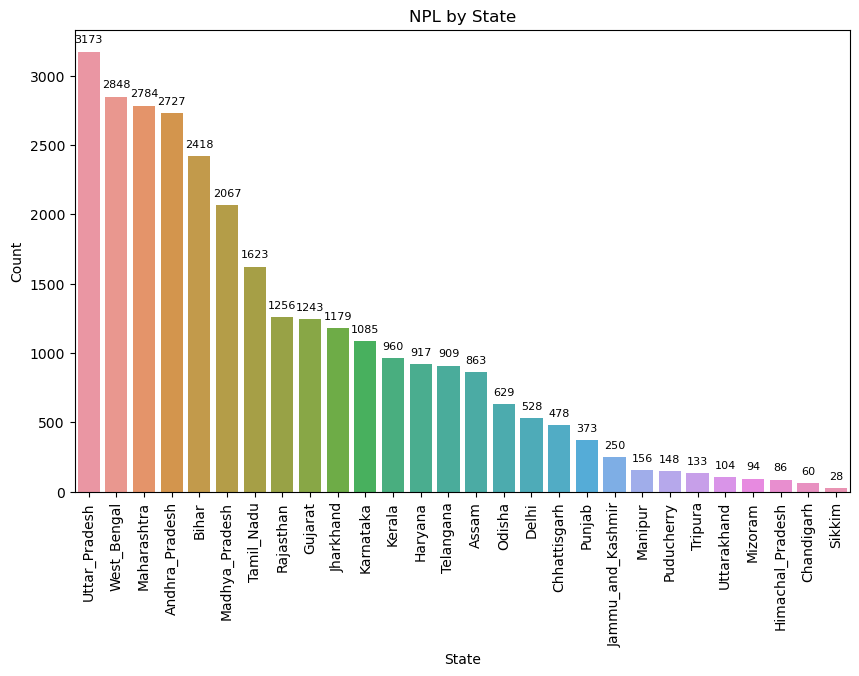

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=risk1, x='state', order=risk1['state'].value_counts().index, ax=ax)
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis tick labels for better readability

plt.xlabel('State', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count')
plt.title('NPL by State')

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show();  # Adding a semicolon at the end of the plt.show() line


### NPL by City

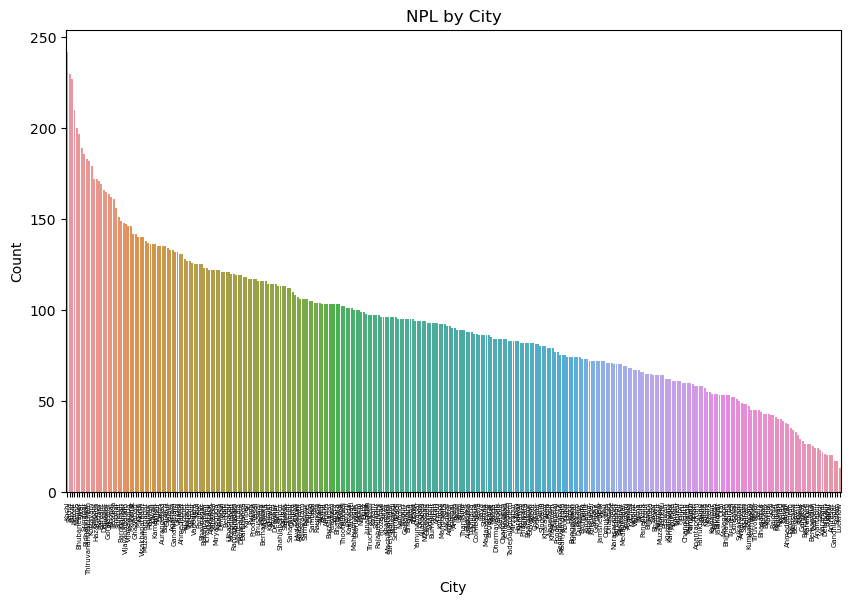

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'city' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=risk1, x='city', order=risk1['city'].value_counts().index, ax=ax)
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis tick labels for better readability
plt.xlabel('City')
plt.ylabel('Count')
plt.title('NPL by City')
plt.show();  # Adding a semicolon at the end of the plt.show() line


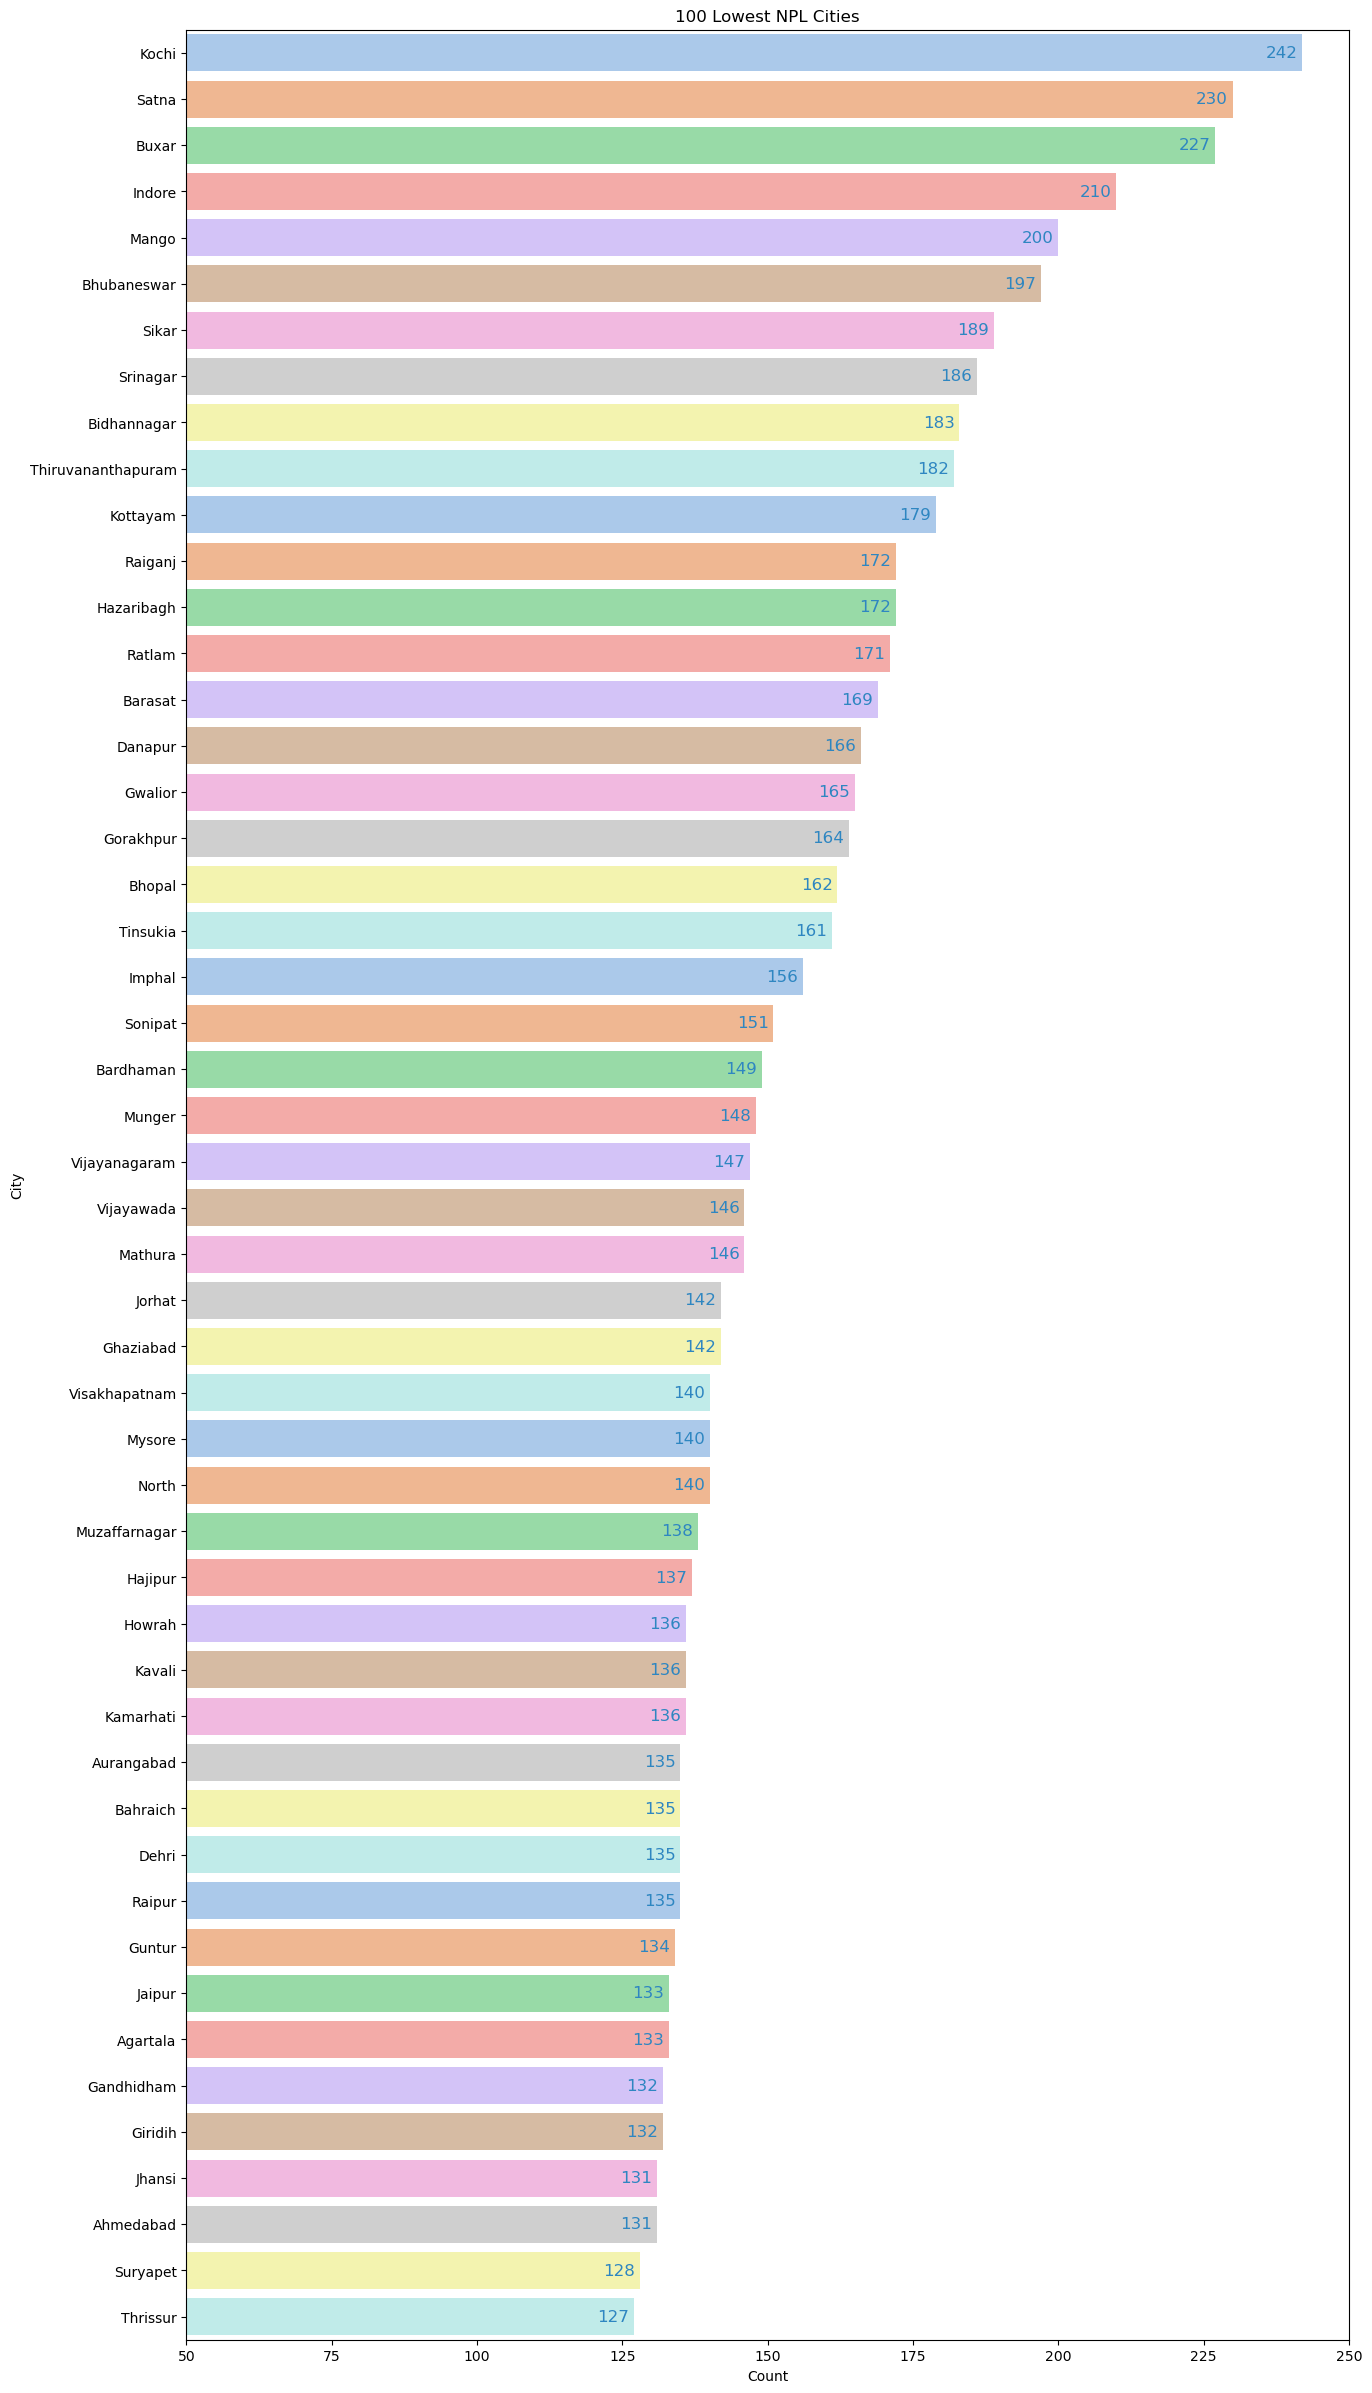

In [62]:
# Get the top 100 cities by count (the 100 cities with the Highest NPL counts) and sort them in ascending order
npl_city = risk1['city'].value_counts().sort_values(ascending=False).head(50)

# Create a countplot for the 'city' column with the top 100 cities
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(data=risk1, y='city', order=npl_city.index, ax=ax, palette='pastel')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('100 Lowest NPL Cities')
plt.xlim(50, 250)

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='#2E86C1', xytext=(-15, 0),
                textcoords='offset points')

plt.show();


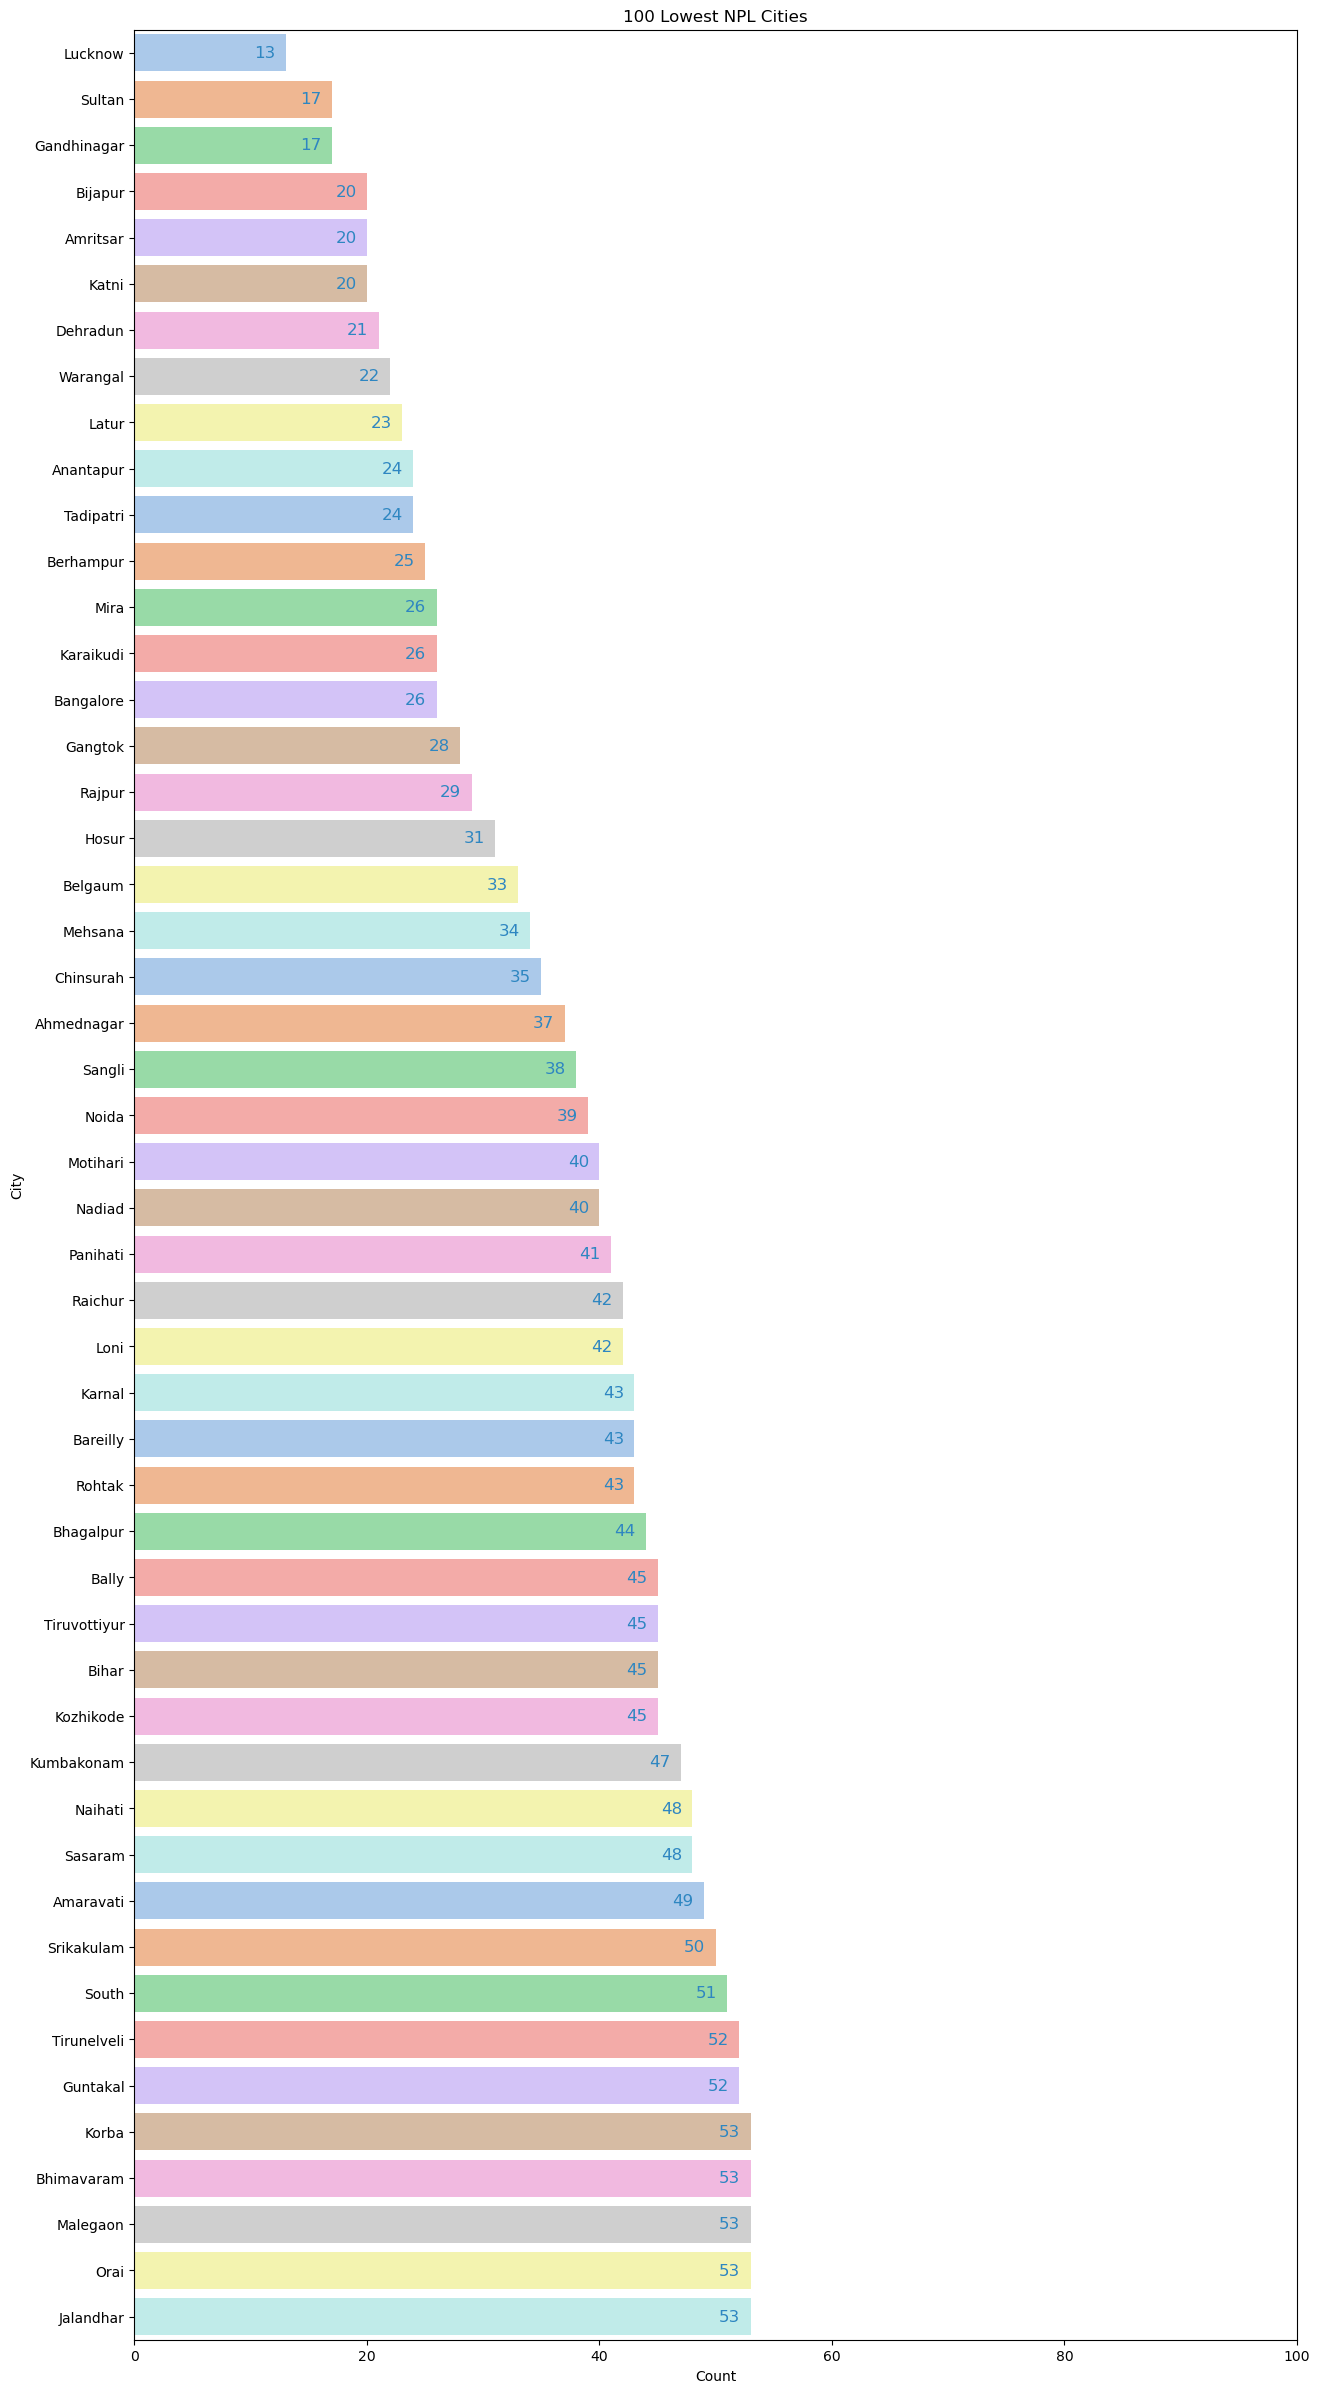

In [63]:
# Get the top 100 cities by count (the 100 cities with the lowest NPL counts) and sort them in ascending order
npl_city = risk1['city'].value_counts().sort_values(ascending=True).head(50)

# Create a countplot for the 'city' column with the top 100 cities
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(data=risk1, y='city', order=npl_city.index, ax=ax, palette='pastel')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('100 Lowest NPL Cities')
plt.xlim(0, 100)

# Add annotations to the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='#2E86C1', xytext=(-15, 0),
                textcoords='offset points')

plt.show();


## PL Analysis

### PL by Profession

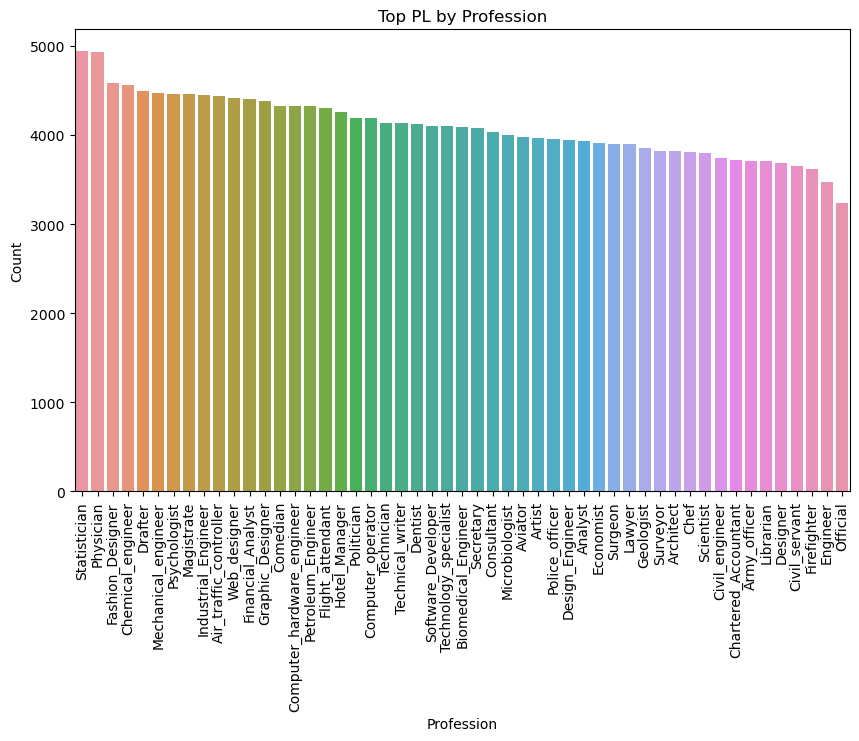

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'prof' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=risk0, x='profession', order=risk0['profession'].value_counts().index, ax=ax)
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis tick labels for better readability
plt.xlabel('Profession', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count')
plt.title('Top PL by Profession')
plt.show();  # Adding a semicolon at the end of the plt.show() line


### PL by State

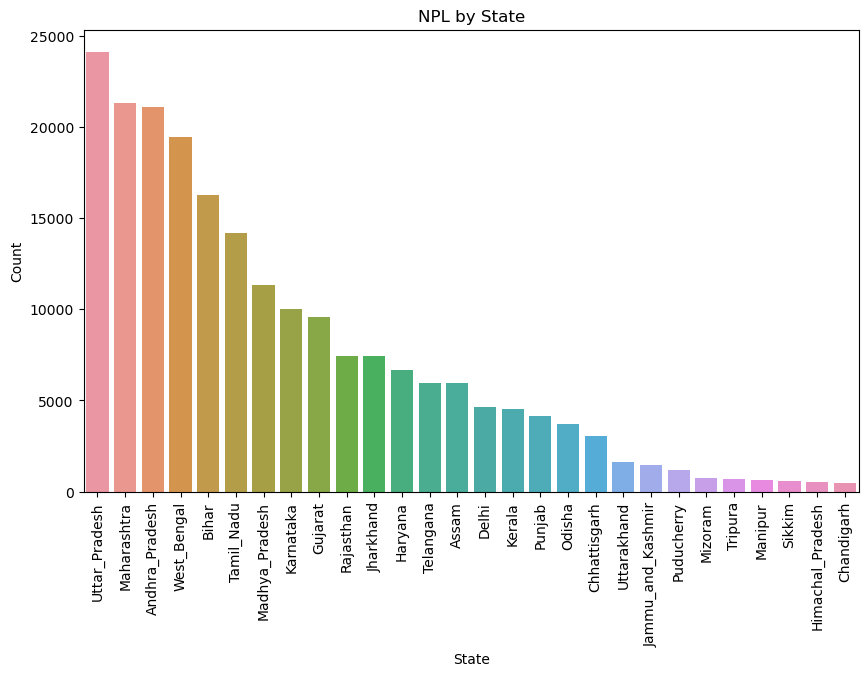

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'state' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=risk0, x='state', order=risk0['state'].value_counts().index, ax=ax)
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis tick labels for better readability
plt.xlabel('State', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count')
plt.title('NPL by State')
plt.show();  # Adding a semicolon at the end of the plt.show() line


# Predictive Modeling

## 1. Normal Machine Learning

#### Pre Proccess

In [66]:

from sklearn.preprocessing import MinMaxScaler
# Inisialisasi Min-Max Scaler
scaler = MinMaxScaler()

# Pisahkan kolom kategorikal (tipe data string)
non_numeric_columns = df_clean2.select_dtypes(exclude=['int', 'float']).columns
df_numeric = df_clean2.drop(columns=non_numeric_columns)
df_numeric.sample(5)

id   income  age  experience  current_job_yrs  current_house_yrs  risk_flag
81837    81838  8025541   53           9                7                 14          0
160327  160328  1232691   43           9                9                 11          0
28032    28033  2214827   74           9                7                 13          0
140892  140893  5897750   76          14                5                 11          0
76743    76744  1967194   58           9                9                 11          0

In [67]:
# Transformasi data pada setiap kolom numerik secara terpisah
for column in df_numeric.columns:
    df_numeric[column] = scaler.fit_transform(df_numeric[[column]])

# Gabungkan kembali dengan kolom non-numerik
df_scaled = pd.concat([df_numeric, df_clean2[non_numeric_columns]], axis=1)

In [68]:
df_scaled.rename(columns = {'segment_state':'zone'}, inplace = True)

In [69]:
#OHE
df_houseown = pd.get_dummies(df_scaled['house_ownership'], prefix='house')
df_prof_cat = pd.get_dummies(df_scaled['segment_profession'])
df_zone = pd.get_dummies(df_scaled['zone'])

df_encoded = df_scaled.join(df_houseown, lsuffix="_left", rsuffix="_right", how='outer')
df_encoded = df_encoded.join(df_prof_cat, lsuffix="_left", rsuffix="_right", how='outer')
df_encoded = df_encoded.join(df_zone, lsuffix="_left", rsuffix="_right", how='outer')

In [70]:
## Label Encode untuk married_single dan car_ownership
from sklearn.preprocessing import LabelEncoder

en=LabelEncoder()
Categorical_cols=['married_single', 'car_ownership']
for cols in Categorical_cols:
    df_encoded[cols]=en.fit_transform(df[cols])

df_encoded.sample(5)

id  income   age  experience  current_job_yrs  current_house_yrs  risk_flag  \
150667 0.598   0.324 0.138       0.150            0.214              0.750      0.000   
104819 0.416   0.282 0.500       0.600            0.857              0.500      0.000   
91775  0.364   0.606 0.293       0.300            0.429              0.750      0.000   
51541  0.205   0.802 0.897       0.850            0.643              1.000      0.000   
240326 0.954   0.964 0.724       0.300            0.429              0.000      0.000   

        married_single house_ownership  car_ownership        profession           city  \
150667               1          rented              0  Fashion_Designer           Orai   
104819               1          rented              0     Hotel_Manager  Vijayanagaram   
91775                0          rented              0           Dentist       Ambattur   
51541                1          rented              0            Artist       Srinagar   
240326               1          rented              0           Analyst        Jaunpur   

                    state experience_cat age_cat   income_cat job_duration_cat  \
150667      Uttar_Pradesh            0-5   21-35  b.2,5m - 5m              0-3   
104819     Andhra_Pradesh          11-15   36-49  b.2,5m - 5m            10-14   
91775          Tamil_Nadu          06-10   36-49  c.5m - 7,5m              4-6   
51541   Jammu_and_Kashmir            >15   65-79      d.>7,5m              7-9   
240326      Uttar_Pradesh          06-10   50-64      d.>7,5m              4-6   

                      zone    segment_profession  house_norent_noown  house_owned  house_rented  \
150667  North Central Zone                Design                   0            0             1   
104819     South East Zone           Hospitality                   0            0             1   
91775           South Zone  Medical Practitioner                   0            0             1   
51541           North Zone         Entertainment                   0            0             1   
240326  North Central Zone      Science/Research                   0            0             1   

        Administration  Aviation  Consultant  Design  Engineering  Entertainment  Finance  \
150667               0         0           0       1            0              0        0   
104819               0         0           0       0            0              0        0   
91775                0         0           0       0            0              0        0   
51541                0         0           0       0            0              1        0   
240326               0         0           0       0            0              0        0   

        Government  Hospitality  IT/Software  Law Enforcement  Medical Practitioner  \
150667           0            0            0                0                     0   
104819           0            1            0                0                     0   
91775            0            0            0                0                     1   
51541            0            0            0                0                     0   
240326           0            0            0                0                     0   

        Science/Research  Central Zone  East Zone  North Central Zone  North East Zone  \
150667                 0             0          0                   1                0   
104819                 0             0          0                   0                0   
91775                  0             0          0                   0                0   
51541                  0             0          0                   0                0   
240326                 1             0          0                   1                0   

        North West Zone  North Zone  South East Zone  South West Zone  South Zone  West Zone  
150667                0           0                0                0           0          0  
104819                0          

<Axes: >

Text(0.5, 1.0, 'Distribution of the target variable')

Text(0.5, 0, 'Target variable')

Text(0, 0.5, 'Count')

[Text(0, 0, '208806'), Text(0, 0, '29119')]

<Axes: >

([<matplotlib.patches.Wedge at 0x1e50290ee10>,
 [Text(-1.012778088683405, -0.42927909695533617, '0'),
  Text(1.1048488020953446, 0.4683045211275268, '1')],
 [Text(-0.55242441200913, -0.2341522347029106, '87.8%'),
  Text(0.6444951345556176, 0.2731776373243906, '12.2%')])

Text(0.5, 1.0, 'Distribution of the target variable')

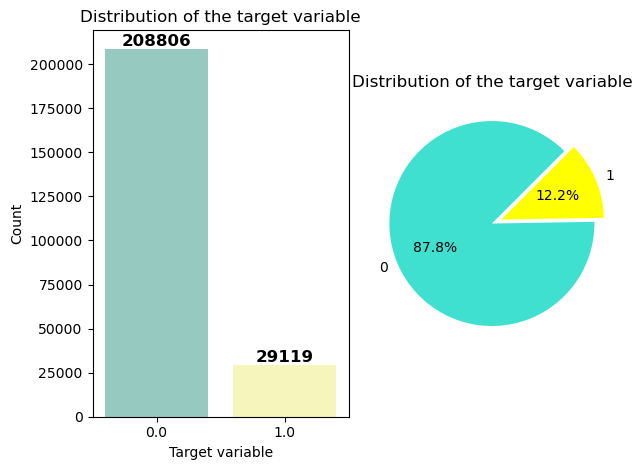

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
ax = sns.countplot(x='risk_flag', data=df_encoded, palette="Set3")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.risk_flag.value_counts(), labels = df.risk_flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable')
plt.tight_layout()
plt.show()

In [72]:
X_nml = df_encoded.drop(['id','risk_flag','profession', 'state', 'house_ownership', 'city','zone', 'segment_profession', 'married_single', 'car_ownership', 'job_duration_cat',	'experience_cat', 'income_cat', 'age_cat'],1)
y_nml = df_encoded[['risk_flag']]

In [73]:
X_nml.count()

income               237925
age                  237925
experience           237925
current_job_yrs      237925
current_house_yrs    237925
                      ...  
North Zone           237925
South East Zone      237925
South West Zone      237925
South Zone           237925
West Zone            237925
Length: 31, dtype: int64

#### Split data

In [74]:
### Split untuk back testing (80:20)
from sklearn.model_selection import train_test_split

X_model , X_bt , y_model, y_bt = train_test_split(X_nml, y_nml, test_size = 0.2, random_state= 42)

<Axes: >

Text(0.5, 1.0, 'Distribution of the target variable(BT)')

Text(0.5, 0, 'Target variable')

Text(0, 0.5, 'Count')

[Text(0, 0, '41663'), Text(0, 0, '5922')]

<Axes: >

([<matplotlib.patches.Wedge at 0x1e514df19d0>,
 [Text(-1.0155399201667663, -0.4227039987363242, '0.0'),
  Text(1.1078617310910177, 0.4611316349850808, '1.0')],
 [Text(-0.5539308655455087, -0.23056581749254043, '87.6%'),
  Text(0.6462526764697603, 0.26899345374129713, '12.4%')])

Text(0.5, 1.0, 'Distribution of the target variable(BT)')

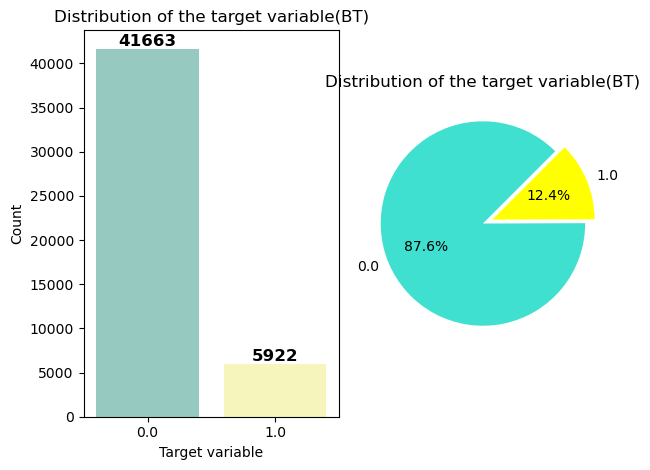

In [75]:
plt.subplot(1,2,1)
ax = sns.countplot(x='risk_flag', data=y_bt, palette="Set3")
plt.title('Distribution of the target variable(BT)')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(y_bt.risk_flag.value_counts(), labels = y_bt.risk_flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable(BT)')
plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Distribution of the target variable(model)')

Text(0.5, 0, 'Target variable')

Text(0, 0.5, 'Count')

[Text(0, 0, '167143'), Text(0, 0, '23197')]

<Axes: >

([<matplotlib.patches.Wedge at 0x1e50acc6650>,
 [Text(-1.0120810352179355, -0.4309199208115034, '0.0'),
  Text(1.1040884350659919, 0.47009438153793065, '1.0')],
 [Text(-0.5520442010279647, -0.23504722953354726, '87.8%'),
  Text(0.6440515871218284, 0.27422172256379285, '12.2%')])

Text(0.5, 1.0, 'Distribution of the target variable(Model)')

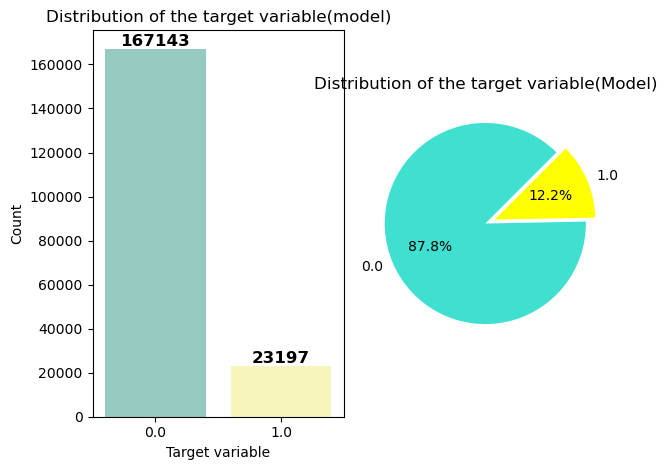

In [76]:
plt.subplot(1,2,1)
ax = sns.countplot(x='risk_flag', data=y_model, palette="Set3")
plt.title('Distribution of the target variable(model)')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(y_model.risk_flag.value_counts(), labels = y_model.risk_flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable(Model)')
plt.tight_layout()
plt.show()

In [77]:
X_train1 , X_test , y_train1 , y_test = train_test_split(X_model, y_model, test_size = 0.25, random_state= 42)

#### Handle Imbalance 4 SMOTE 60:40

In [78]:
X_model.shape,y_model.shape

((190340, 31), (190340, 1))

In [79]:
X_train1 , X_test , y_train1 , y_test = train_test_split(X_model, y_model, test_size = 0.25, random_state= 42)

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.67)
X_train, y_train = smote.fit_resample(X_train1, y_train1)

In [81]:
y_train1.shape,y_test.shape

((142755, 1), (47585, 1))

<Figure size 800x600 with 0 Axes>

Text(0.0, 125296.0, '59.88%')

Text(1.0, 83948.0, '40.12%')

Text(0.5, 1.0, 'Balance Plot Data')

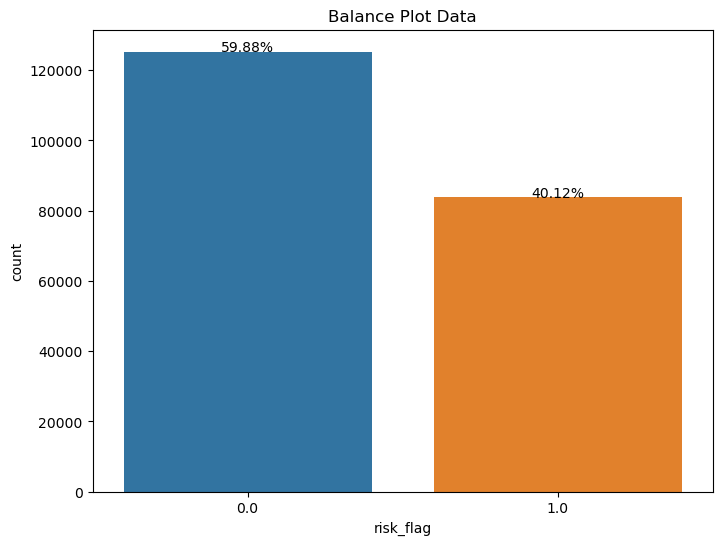

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=y_train, x='risk_flag')
for p in ax.patches:
    text = f'{p.get_height()/len(y_train)*100:.2f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), text, ha='center')
ax.set_title('Balance Plot Data')
plt.show()

#### Handle Imbalance 5 SMOTE 50:50

In [78]:
X_model.shape,y_model.shape

((190340, 31), (190340, 1))

In [ ]:
X_train1 , X_test , y_train1 , y_test = train_test_split(X_model, y_model, test_size = 0.25, random_state= 42)

In [ ]:
y_train1.shape,y_test.shape

((142755, 1), (47585, 1))

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train1, y_train1)

In [ ]:
X_train.shape,y_train.shape

((250592, 31), (250592, 1))

In [ ]:
X_train.shape,X_train1.shape

((250592, 31), (142755, 31))

### Model Selection

In [83]:
# Model Selection

#---------- Loading Independency ----------#
#---------- model evaluator --------------#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import recall_score

#---------- predictive model---------------#
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#---------- model classifier -------------#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#---------- productivity seed ----------#
# Seed for reproducibility
seed = 7

# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier())) # "Classification and Regression Trees"
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))

In [84]:
# Evaluate each model in turn

results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_model, y_model, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
CART: 0.546769 (0.007284)
RF: 0.517803 (0.007324)
KNN: 0.489601 (0.011200)
NB: 0.051253 (0.006228)
XGB: 0.142619 (0.009173)


In [85]:
# Evaluate each model in turn

results = []
names = []
scoring = 'precision'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_model, y_model, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
CART: 0.506225 (0.009910)
RF: 0.590407 (0.007702)
KNN: 0.543012 (0.007921)
NB: 0.160297 (0.014012)
XGB: 0.654366 (0.016631)


In [86]:
# Evaluate each model in turn

results = []
names = []
scoring = 'f1'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_model, y_model, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
CART: 0.525873 (0.005255)
RF: 0.553618 (0.006341)
KNN: 0.514811 (0.006480)
NB: 0.077378 (0.007402)
XGB: 0.234024 (0.012150)


Text(0.5, 0.98, 'Model Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e518ed3710>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5023fce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e518ed2450>,
 'medians': [<matplotlib.lines.Line2D at 0x1e502881290>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e5023fd550>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'CART'),
 Text(4, 0, 'RF'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'NB'),
 Text(7, 0, 'XGB')]

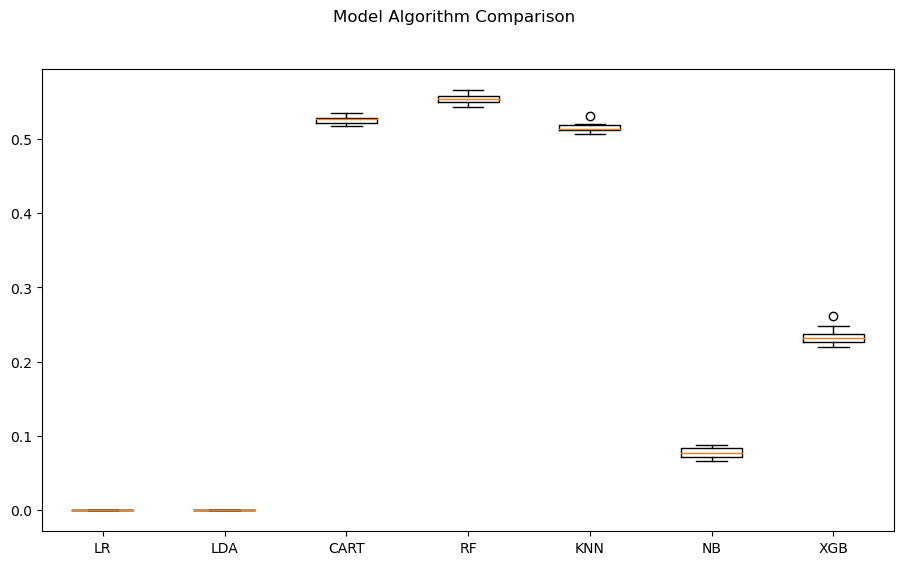

In [87]:
# boxplot algorithm comparison (SMOTE)

fig = plt.figure(figsize=(11,6))
fig.suptitle('Model Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

model_plot = fig

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, jaccard_score, log_loss
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    score1 = cross_validate(model, X=X_model, y=y_model, cv=5, scoring='precision', return_train_score=True)
    print('Precision (crossval train): '+ str(score1['train_score'].mean()))
    print('Precision (crossval test): '+ str(score1['test_score'].mean()))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    score2 = cross_validate(model, X=X_model, y=y_model, cv=5, scoring='recall', return_train_score=True)
    print('Recall (crossval train): '+ str(score2['train_score'].mean()))
    print('Recall (crossval test): '+ str(score2['test_score'].mean()))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    score3 = cross_validate(model, X=X_model, y=y_model, cv=5, scoring='f1', return_train_score=True)
    print('F1-Score (crossval train): '+ str(score3['train_score'].mean()))
    print('F1-Score (crossval test): '+ str(score3['test_score'].mean()))

    print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
    print('Log Loss : ',(log_loss(y_test, y_pred)))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #

    score = cross_validate(model, X=X_train, y=y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### DT Normal

In [89]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

DecisionTreeClassifier()

Accuracy (Test Set): 0.88
Precision (Test Set): 0.49
Precision (crossval train): 0.7250466926665923
Precision (crossval test): 0.5104257057338921
Recall (Test Set): 0.80
Recall (crossval train): 0.773936286681436
Recall (crossval test): 0.5467522541273014
F1-Score (Test Set): 0.61
F1-Score (crossval train): 0.7486865132553386
F1-Score (crossval test): 0.5269723169484176
Jaccard Score :  0.7807091402376275
Log Loss :  4.438705660612094
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9788360278378327
roc_auc (crossval test): 0.9192440204110426


In [90]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     38239
         1.0       0.80      0.49      0.61      9346

    accuracy                           0.88     47585
   macro avg       0.85      0.73      0.77     47585
weighted avg       0.87      0.88      0.86     47585



<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

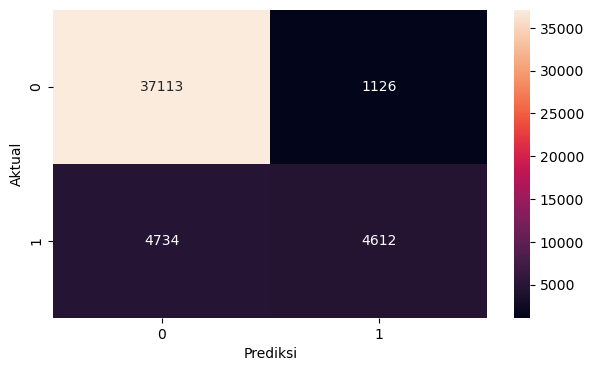

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

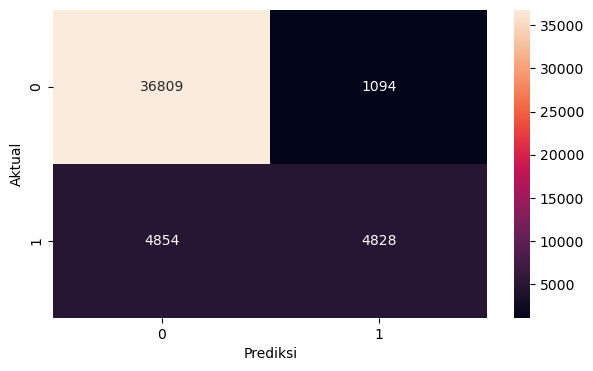

In [92]:
from sklearn.metrics import confusion_matrix
yb_pred = dt.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### RF Normal

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

RandomForestClassifier()

Accuracy (Test Set): 0.89
Precision (Test Set): 0.54
Precision (crossval train): 0.717766450167658
Precision (crossval test): 0.594485500504471
Recall (Test Set): 0.76
Recall (crossval train): 0.7938526091956472
Recall (crossval test): 0.5185588730478476
F1-Score (Test Set): 0.63
F1-Score (crossval train): 0.7539036240920541
F1-Score (crossval test): 0.5553525977809327
Jaccard Score :  0.8076316739159338
Log Loss :  3.8357688507405543
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.974386755740286
roc_auc (crossval test): 0.9603665907143082


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

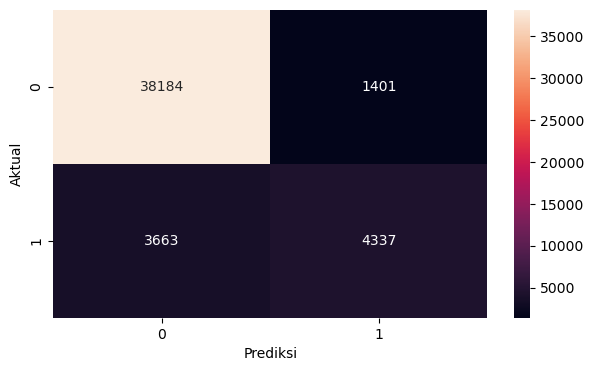

In [94]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

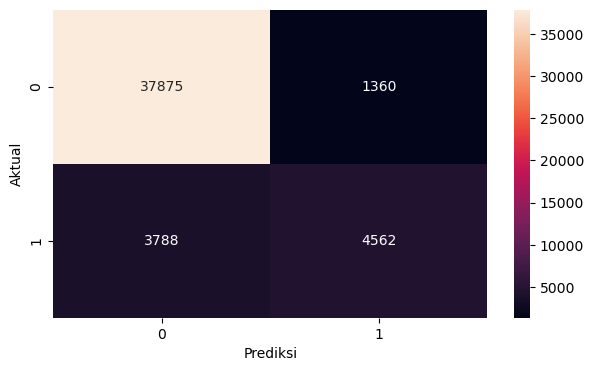

In [95]:
from sklearn.metrics import confusion_matrix
yb_pred = rf.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### KNN Normal

In [96]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

KNeighborsClassifier()

Accuracy (Test Set): 0.87
Precision (Test Set): 0.46
Precision (crossval train): 0.5997806372080736
Precision (crossval test): 0.5465485724744727
Recall (Test Set): 0.56
Recall (crossval train): 0.5359206401299845
Recall (crossval test): 0.4955385375861326
F1-Score (Test Set): 0.51
F1-Score (crossval train): 0.5660378614291929
F1-Score (crossval test): 0.5197865577468858
Jaccard Score :  0.7669884886743409
Log Loss :  4.753050856713463
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.8897539439808992
roc_auc (crossval test): 0.8755128622030153


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

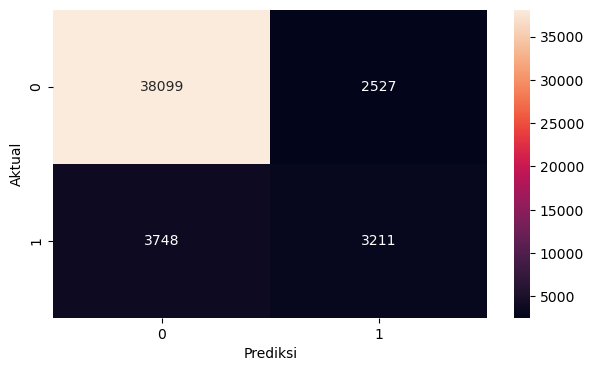

In [97]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

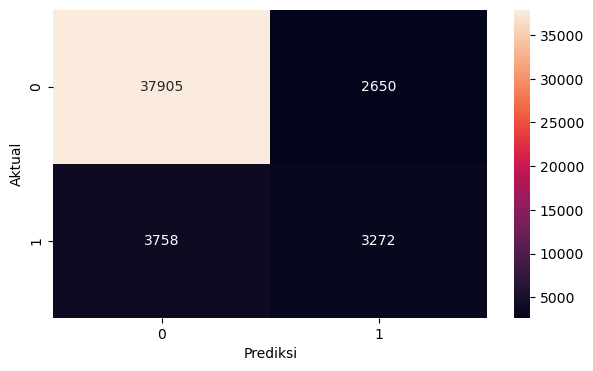

In [98]:
from sklearn.metrics import confusion_matrix
yb_pred = knn.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### XGB Normal

In [99]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.53
Precision (crossval train): 0.7281244418803657
Precision (crossval test): 0.6522438958666712
Recall (Test Set): 0.61
Recall (crossval train): 0.16845939607911828
Recall (crossval test): 0.14583766938475148
F1-Score (Test Set): 0.57
F1-Score (crossval train): 0.2734209136236746
F1-Score (crossval test): 0.23822976504401713
Jaccard Score :  0.7984768599882835
Log Loss :  4.0387676761746905
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.9465064068244956
roc_auc (crossval test): 0.9383282778663491


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

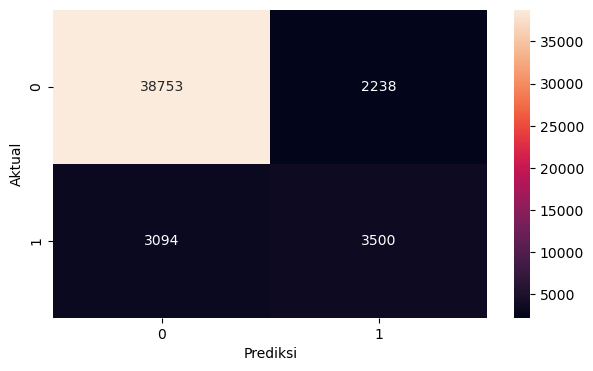

In [100]:
from sklearn.metrics import confusion_matrix
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

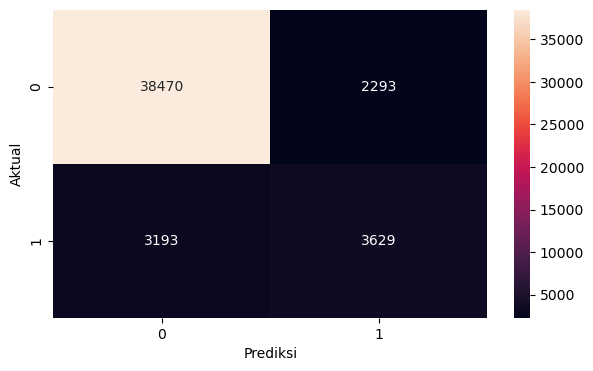

In [101]:
from sklearn.metrics import confusion_matrix
yb_pred = xg.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### Adaboost Normal

In [102]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)
eval_classification(ab)

AdaBoostClassifier(random_state=42)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.21
Precision (crossval train): 0.7413265993265993
Precision (crossval test): 0.7299999999999999
Recall (Test Set): 0.06
Recall (crossval train): 0.002123118325009089
Recall (crossval test): 0.0020692907210977394
F1-Score (Test Set): 0.09
F1-Score (crossval train): 0.004233912585550553
F1-Score (crossval test): 0.0041236472191327105
Jaccard Score :  0.7557420902130799
Log Loss :  5.01437397154472
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.61
roc_auc (crossval train): 0.6090989489753038
roc_auc (crossval test): 0.6065112976799331


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

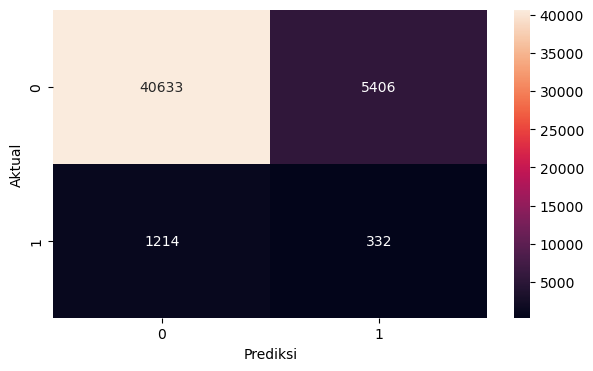

In [103]:
from sklearn.metrics import confusion_matrix
y_pred = ab.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

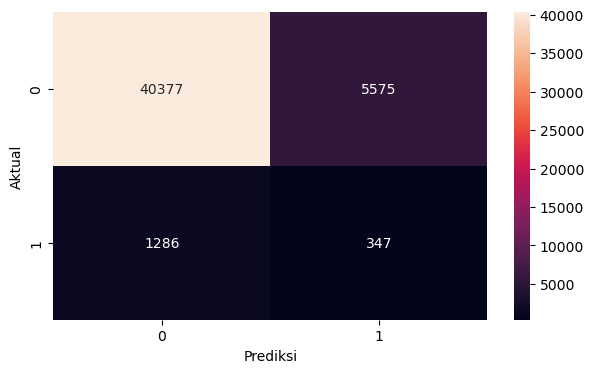

In [104]:
from sklearn.metrics import confusion_matrix
yb_pred = ab.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### GaussianNB Normal

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
eval_classification(gnb)

GaussianNB()

Accuracy (Test Set): 0.57
Precision (Test Set): 0.13
Precision (crossval train): 0.1592607856208311
Precision (crossval test): 0.15665102063566294
Recall (Test Set): 0.47
Recall (crossval train): 0.0511380910119596
Recall (crossval test): 0.050006318246352155
F1-Score (Test Set): 0.21
F1-Score (crossval train): 0.077375788591304
F1-Score (crossval test): 0.07578511206650311
Jaccard Score :  0.3968883017760164
Log Loss :  15.561980852777385
roc_auc (test-proba): 0.54
roc_auc (train-proba): 0.55
roc_auc (crossval train): 0.5481142572807952
roc_auc (crossval test): 0.5474191884610156


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

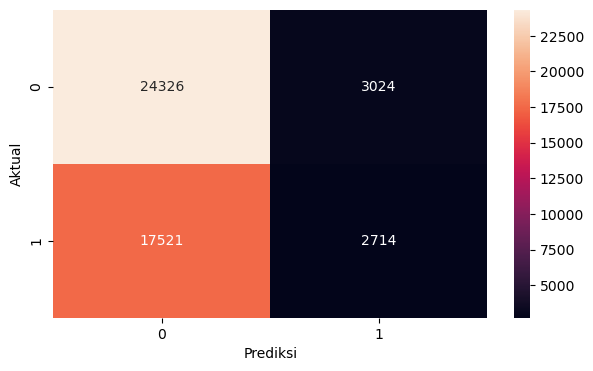

In [106]:
from sklearn.metrics import confusion_matrix
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

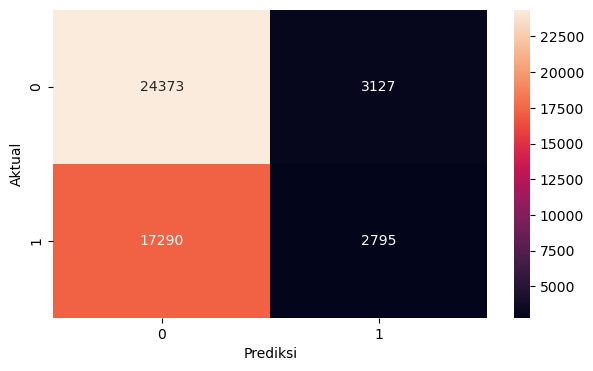

In [107]:
from sklearn.metrics import confusion_matrix
yb_pred = gnb.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### Catboost normal

In [108]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42, verbose=False) # verbose=False untuk tidak menampilkan kalkukasi learning, walau cepet tapi rese, cape kan scroll 1000 x 3
cb.fit(X_train, y_train)
eval_classification(cb)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.55
Precision (crossval train): 0.7212324826575054
Precision (crossval test): 0.6472486334328741
Recall (Test Set): 0.70
Recall (crossval train): 0.20787175752181727
Recall (crossval test): 0.17821280968698666
F1-Score (Test Set): 0.61
F1-Score (crossval train): 0.32266532702619427
F1-Score (crossval test): 0.2793911223887978
Jaccard Score :  0.8075286788725974
Log Loss :  3.83804122565213
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9578381147577153
roc_auc (crossval test): 0.9502947369031055


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

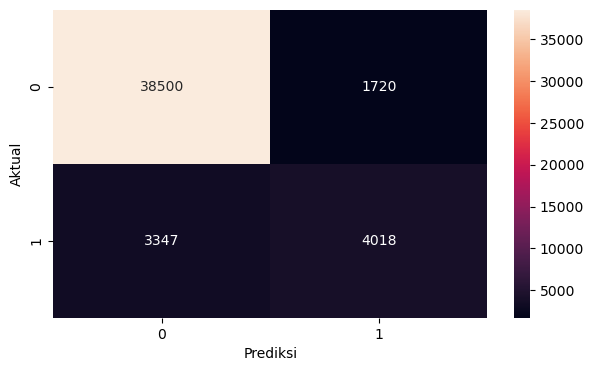

In [109]:
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

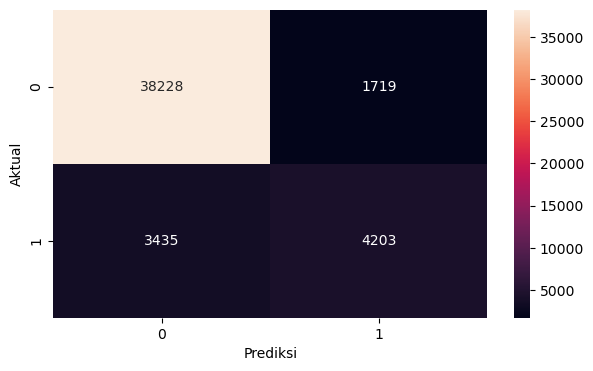

In [110]:
from sklearn.metrics import confusion_matrix
yb_pred = cb.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

### Model Pilihan (?) : DT, RF, XGB, CB

#### HT DT

In [111]:
# Hyperparameter

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter
parameter = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf"  : [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"]
}


parameter2 = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# models
dt_hyp = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                           param_distributions=parameter, cv=3, n_jobs=-1, verbose=1)
dt_hyp.fit(X_train, y_train)

print(f"model train score: {dt_hyp.score(X_train, y_train)},\n"
      f"model test score: {dt_hyp.score(X_test, y_test)},\n"
      f"model best score: {dt_hyp.best_score_}")

if dt_hyp.score(X_train, y_train) > dt_hyp.score(X_test, y_test):
    print("Model : Overfit")
else:
    print("Model : Underfit")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 24],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=1)

model train score: 0.8873133757718262,
model test score: 0.8514237679941158,
model best score: 0.8234119018944389
Model : Overfit


In [112]:
dt_hyp.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 24,
 'criterion': 'log_loss'}

In [113]:
best_dt = dt_hyp.best_estimator_
best_dt.fit(X_train, y_train)
eval_classification(best_dt)

DecisionTreeClassifier(criterion='log_loss', max_depth=24, max_features='sqrt',
                       random_state=42)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.43
Precision (crossval train): 0.7101895625911638
Precision (crossval test): 0.5312908101722236
Recall (Test Set): 0.72
Recall (crossval train): 0.5521083204619713
Recall (crossval test): 0.41013858330050323
F1-Score (Test Set): 0.54
F1-Score (crossval train): 0.6207622512955663
F1-Score (crossval test): 0.46249666590698124
Jaccard Score :  0.7412862501143537
Log Loss :  5.355230208281145
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9328693922133947
roc_auc (crossval test): 0.8905823481889499


In [114]:
from sklearn.metrics import classification_report

y_pred = best_dt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     37955
         1.0       0.72      0.43      0.54      9630

    accuracy                           0.85     47585
   macro avg       0.80      0.69      0.73     47585
weighted avg       0.84      0.85      0.84     47585



In [115]:
dt_hyp2 = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth= None, max_features= 4, min_samples_leaf= 1)

In [116]:
best_dt2 = dt_hyp2
best_dt2.fit(X_train, y_train)
eval_classification(best_dt2)

DecisionTreeClassifier(max_features=4, random_state=42)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.49
Precision (crossval train): 0.7250466926665923
Precision (crossval test): 0.5160370609660928
Recall (Test Set): 0.82
Recall (crossval train): 0.773936286681436
Recall (crossval test): 0.5417948186663297
F1-Score (Test Set): 0.61
F1-Score (crossval train): 0.7486865132553386
F1-Score (crossval test): 0.5285650693805979
Jaccard Score :  0.7757253475137607
Log Loss :  4.552324406190904
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9788360278378327
roc_auc (crossval test): 0.9143133613533589


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

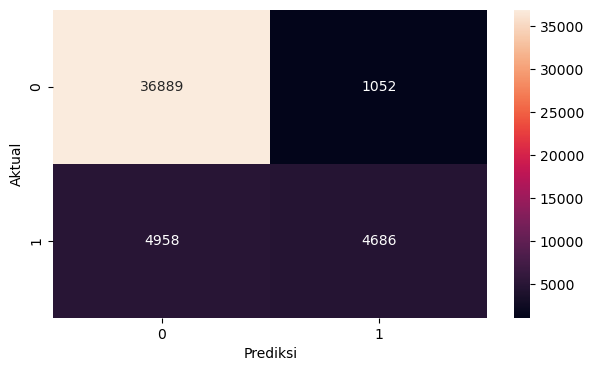

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = best_dt.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

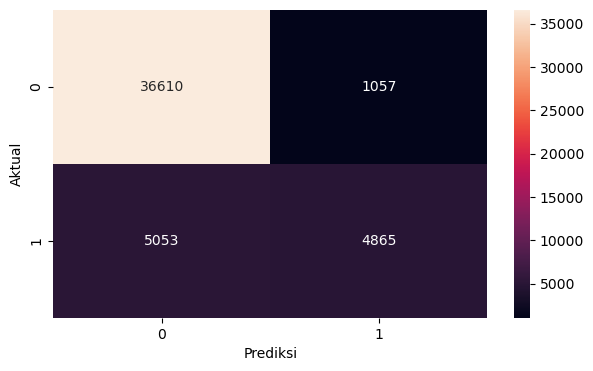

In [ ]:
yb_pred = best_dt.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### HT RF

In [ ]:
# Hyperparameter

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Parameter
parameter = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf"  : [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "criterion": ["gini", "entropy", "log_loss"]
}

parameter2 = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

parameter3 = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

parameter4 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

parameter5 ={"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# models
rf_hyp4 = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=parameter4, cv=3, n_jobs=-1, verbose=1)
rf_hyp4.fit(X_train, y_train)

print(f"model train score: {rf_hyp4.score(X_train, y_train)},\n"
      f"model test score: {rf_hyp4.score(X_test, y_test)},\n"
      f"model best score: {rf_hyp4.best_score_}")

if rf_hyp4.score(X_train, y_train) > rf_hyp4.score(X_test, y_test):
    print("Model : Overfit")
else:
    print("Model : Underfit")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   verbose=1)

model train score: 0.8710220459367217,
model test score: 0.8578346592874438,
model best score: 0.8413200584284203
Model : Overfit


In [ ]:
rf_hyp2.best_estimator_

RandomForestClassifier(max_features=8, random_state=42)

In [ ]:
rf_hyp2 = RandomForestClassifier(max_features=8, random_state=42)

In [ ]:
best_rf2 = rf_hyp2
best_rf2.fit(X_train, y_train)
eval_classification(best_rf2)

RandomForestClassifier(max_features=8, random_state=42)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.55
Precision (crossval train): 0.717283821770149
Precision (crossval test): 0.5941119470685667
Recall (Test Set): 0.75
Recall (crossval train): 0.7928179557138268
Recall (crossval test): 0.5165329552296496
F1-Score (Test Set): 0.63
F1-Score (crossval train): 0.7531501600933728
F1-Score (crossval test): 0.5525615363896945
Jaccard Score :  0.8094531903566811
Log Loss :  3.795623560636042
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9745118304521035
roc_auc (crossval test): 0.9607730136277185


In [ ]:
rf_hyp3.best_estimator_

RandomForestClassifier(max_depth=80, max_features='auto', min_samples_split=5,
                       n_estimators=2000, random_state=42)

In [ ]:
rf_hyp3 = RandomForestClassifier(max_depth=80, max_features='auto', min_samples_split=5, n_estimators=2000, random_state=42)

In [ ]:
best_rf3 = rf_hyp3
best_rf3.fit(X_train, y_train)
eval_classification(best_rf3)

KeyboardInterrupt: 

In [ ]:
rf_hyp4.best_estimator_

RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=1000,
                       random_state=42)

In [ ]:
rf_hyp4 = RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42)

In [ ]:
best_rf4 = rf_hyp4.best_estimator_
best_rf4.fit(X_train, y_train)
eval_classification(best_rf4)

In [ ]:
### RFHYP2
Accuracy (Test Set): 0.86
Precision (Test Set): 0.85
Recall (Test Set): 0.79
F1-Score (Test Set): 0.82

###RF HYP 3
Accuracy (Test Set): 0.86
Precision (Test Set): 0.85
Recall (Test Set): 0.78
F1-Score (Test Set): 0.82

####RF HYP 4
Accuracy (Test Set): 0.86
Precision (Test Set): 0.86
Recall (Test Set): 0.77
F1-Score (Test Set): 0.81

####RF HYP 5

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

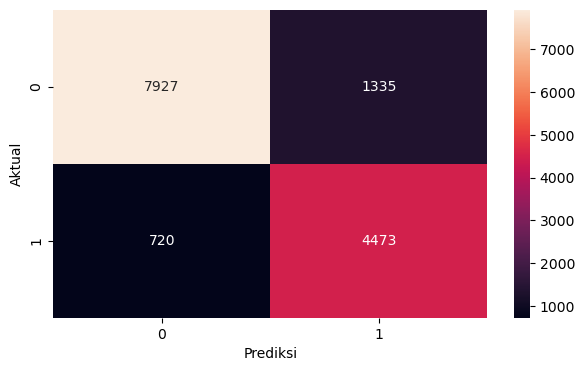

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

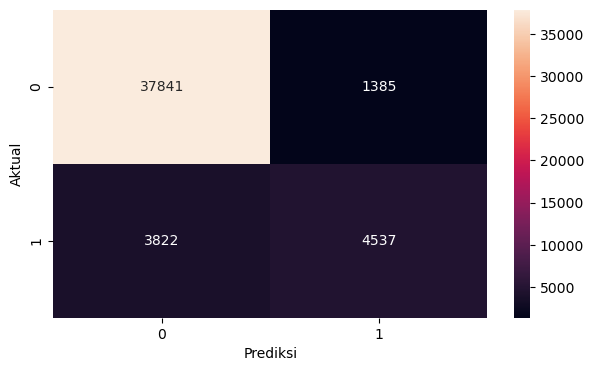

In [ ]:
yb_pred = best_rf.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### HT KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_hyp = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 15, weights= 'distance')

In [ ]:
best_knn = knn_hyp
best_knn.fit(X_train, y_train)
eval_classification(best_knn)

KNeighborsClassifier(n_neighbors=15, weights='distance')

Accuracy (Test Set): 0.88
Precision (Test Set): 0.49
Precision (crossval train): 0.7115440792104908
Precision (crossval test): 0.5529504156195889
Recall (Test Set): 0.56
Recall (crossval train): 0.7764365183581108
Recall (crossval test): 0.5241631854368138
F1-Score (Test Set): 0.53
F1-Score (crossval train): 0.7425616660860856
F1-Score (crossval test): 0.5381203678372489
Jaccard Score :  0.781942780107849
Log Loss :  4.410679703369322
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9751455354779157
roc_auc (crossval test): 0.9434404312687164


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

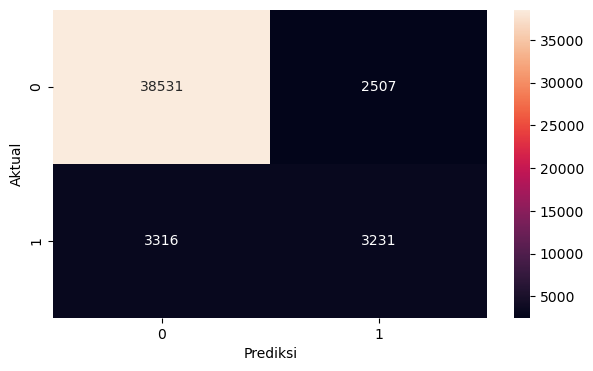

In [ ]:
y_pred = best_knn.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

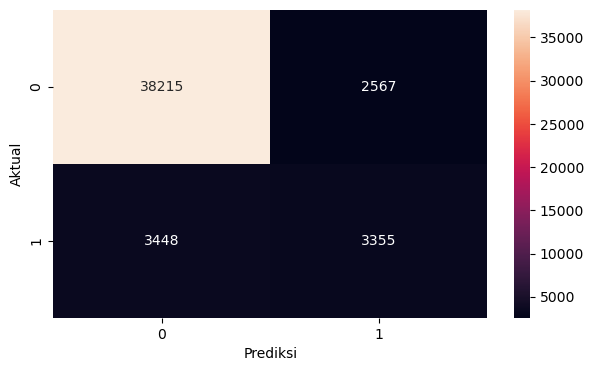

In [ ]:
yb_pred = best_knn.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### HT XGB

In [130]:
# Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
# Parameter
parameter = {
    "max_depth": [int(x) for x in np.linspace(2, 24, 2)],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[1,2,3]
}

parameter2 = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}



# models
xg_hyp2 = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=parameter2, cv=3, n_jobs=-1, verbose=1)
xg_hyp2.fit(X_train, y_train)

print(f"model train score: {xg_hyp2.score(X_train, y_train)},\n"
      f"model test score: {xg_hyp2.score(X_test, y_test)},\n"
      f"model best score: {xg_hyp2.best_score_}")

if xg_hyp2.score(X_train, y_train) > xg_hyp2.score(X_test, y_test):
    print("Model : Overfit")
else:
    print("Model : Underfit")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=1)

model train score: 0.933536923400432,
model test score: 0.8965220132394662,
model best score: 0.9252069354437881
Model : Overfit


In [131]:
xg_hyp2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
best_xg2 = xg_hyp2.best_estimator_
best_xg2.fit(X_train, y_train)
eval_classification(best_xg2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.55
Precision (crossval train): 0.6781965788557717
Precision (crossval test): 0.6031022737259695
Recall (Test Set): 0.75
Recall (crossval train): 0.5667867929898509
Recall (crossval test): 0.4666124350521441
F1-Score (Test Set): 0.64
F1-Score (crossval train): 0.6174522878192459
F1-Score (crossval test): 0.5261348813590258
Jaccard Score :  0.8124511988421033
Log Loss :  3.7297246882003336
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9734217942328558
roc_auc (crossval test): 0.9602812830361881


In [133]:
from xgboost import XGBClassifier
xg_hyp = XGBClassifier(max_depth=24, n_estimators=200)

In [134]:
best_xg = xg_hyp
best_xg.fit(X_train, y_train)
eval_classification(best_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.55
Precision (crossval train): 0.7207533961736864
Precision (crossval test): 0.5878167188684111
Recall (Test Set): 0.75
Recall (crossval train): 0.7843148006338078
Recall (crossval test): 0.5113595565334385
F1-Score (Test Set): 0.63
F1-Score (crossval train): 0.7511843438775478
F1-Score (crossval test): 0.5468981926609005
Jaccard Score :  0.8095564048447512
Log Loss :  3.793351185724465
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.978614107050047
roc_auc (crossval test): 0.9640576628258325


<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

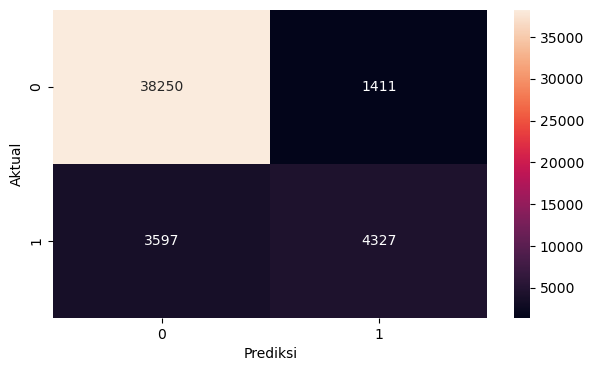

In [90]:
from sklearn.metrics import confusion_matrix
y_pred = best_xg.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<Figure size 700x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Prediksi')

Text(58.222222222222214, 0.5, 'Aktual')

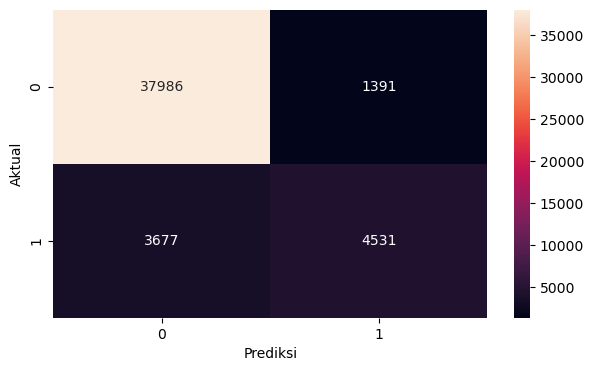

In [91]:
yb_pred = best_xg.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### HT CB

In [118]:
# Hyperparameter
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Parameter
parameter = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
             }

parameter2 = {'depth'         : sp_randInt(1, 10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10, 100)
             }

parameter3 = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)
             }

# models
cb_hyp3 = RandomizedSearchCV(CatBoostClassifier(random_state=42),
                           param_distributions=parameter3,scoring='recall', cv=3, n_jobs=-1, verbose=1)
cb_hyp3.fit(X_train, y_train)

print(f"model train score: {cb_hyp3.score(X_train, y_train)},\n"
      f"model test score: {cb_hyp3.score(X_test, y_test)},\n"
      f"model best score: {cb_hyp3.best_score_}")

if cb_hyp3.score(X_train, y_train) > cb_hyp3.score(X_test, y_test):
    print("Model : Overfit")
else:
    print("Model : Underfit")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6784995	total: 46.4ms	remaining: 46.3s
1:	learn: 0.6691382	total: 86.3ms	remaining: 43.1s
2:	learn: 0.6581944	total: 128ms	remaining: 42.7s
3:	learn: 0.6512532	total: 169ms	remaining: 42.1s
4:	learn: 0.6424611	total: 213ms	remaining: 42.3s
5:	learn: 0.6381467	total: 261ms	remaining: 43.3s
6:	learn: 0.6327781	total: 313ms	remaining: 44.4s
7:	learn: 0.6268882	total: 357ms	remaining: 44.2s
8:	learn: 0.6225473	total: 398ms	remaining: 43.8s
9:	learn: 0.6164644	total: 440ms	remaining: 43.6s
10:	learn: 0.6113872	total: 485ms	remaining: 43.6s
11:	learn: 0.6070266	total: 538ms	remaining: 44.3s
12:	learn: 0.6035471	total: 579ms	remaining: 43.9s
13:	learn: 0.5974357	total: 618ms	remaining: 43.6s
14:	learn: 0.5922860	total: 657ms	remaining: 43.1s
15:	learn: 0.5870203	total: 704ms	remaining: 43.3s
16:	learn: 0.5830072	total: 755ms	remaining: 43.6s
17:	learn: 0.5784118	total: 797ms	remaining: 43.5s
18:	learn: 0.5731681	total: 8

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001E523C54F50>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E519953410>},
                   scoring='recall', verbose=1)

model train score: 0.9651450898175061,
model test score: 0.7540955036598118,
model best score: 0.9457033344590342
Model : Overfit


In [122]:
cb_hyp3.best_estimator_

In [123]:
best_cb2 = cb_hyp3.best_estimator_
best_cb2.fit(X_train, y_train)
eval_classification(best_cb2)

0:	learn: 0.6784995	total: 49.4ms	remaining: 49.4s
1:	learn: 0.6691382	total: 98ms	remaining: 48.9s
2:	learn: 0.6581944	total: 146ms	remaining: 48.6s
3:	learn: 0.6512532	total: 190ms	remaining: 47.4s
4:	learn: 0.6424611	total: 236ms	remaining: 47s
5:	learn: 0.6381467	total: 294ms	remaining: 48.8s
6:	learn: 0.6327781	total: 344ms	remaining: 48.8s
7:	learn: 0.6268882	total: 391ms	remaining: 48.4s
8:	learn: 0.6225473	total: 438ms	remaining: 48.2s
9:	learn: 0.6164644	total: 486ms	remaining: 48.1s
10:	learn: 0.6113872	total: 547ms	remaining: 49.2s
11:	learn: 0.6070266	total: 603ms	remaining: 49.6s
12:	learn: 0.6035471	total: 649ms	remaining: 49.3s
13:	learn: 0.5974357	total: 697ms	remaining: 49.1s
14:	learn: 0.5922860	total: 741ms	remaining: 48.7s
15:	learn: 0.5870203	total: 795ms	remaining: 48.9s
16:	learn: 0.5830072	total: 847ms	remaining: 49s
17:	learn: 0.5784118	total: 892ms	remaining: 48.7s
18:	learn: 0.5731681	total: 944ms	remaining: 48.7s
19:	learn: 0.5687869	total: 997ms	remaining: 

Accuracy (Test Set): 0.89
Precision (Test Set): 0.55
0:	learn: 0.5607858	total: 36.9ms	remaining: 36.9s
1:	learn: 0.4823465	total: 76.3ms	remaining: 38.1s
2:	learn: 0.4357447	total: 113ms	remaining: 37.5s
3:	learn: 0.4070909	total: 146ms	remaining: 36.3s
4:	learn: 0.3892925	total: 178ms	remaining: 35.4s
5:	learn: 0.3770712	total: 210ms	remaining: 34.7s
6:	learn: 0.3697525	total: 246ms	remaining: 34.8s
7:	learn: 0.3646390	total: 291ms	remaining: 36.1s
8:	learn: 0.3609386	total: 333ms	remaining: 36.6s
9:	learn: 0.3584252	total: 363ms	remaining: 36s
10:	learn: 0.3560772	total: 394ms	remaining: 35.5s
11:	learn: 0.3538507	total: 429ms	remaining: 35.3s
12:	learn: 0.3520439	total: 461ms	remaining: 35s
13:	learn: 0.3503978	total: 494ms	remaining: 34.8s
14:	learn: 0.3491693	total: 530ms	remaining: 34.8s
15:	learn: 0.3477565	total: 566ms	remaining: 34.8s
16:	learn: 0.3464203	total: 616ms	remaining: 35.6s
17:	learn: 0.3448485	total: 647ms	remaining: 35.3s
18:	learn: 0.3435968	total: 678ms	remaini

In [ ]:
y_pred = best_cb2.predict(X_test)
cm = confusion_matrix(y_pred , y_test)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

In [ ]:
yb_pred = best_cb2.predict(X_bt)
cm = confusion_matrix(yb_pred , y_bt)

plt.figure(figsize = (7 , 4))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

#### Best Model a.Tunning: XGBoost (HT1)

##### Learning curve

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = XGBClassifier(max_depth=i, n_estimators=200)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

#        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))           # biar ga rese

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(5, 50, 50)]
draw_learning_curve(param_values)


##### Feature Importance

In [92]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

perm2 = PermutationImportance(best_xg, scoring = 'roc_auc' ,random_state=42).fit(X_test, y_test)
show_weights(perm2, feature_names = list(X_test.columns), top=32)

<Figure size 500x400 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operator Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

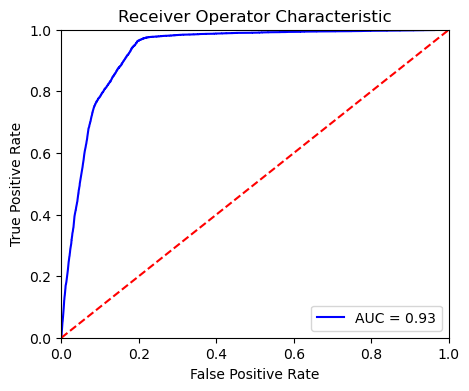

In [93]:
from sklearn.metrics import roc_curve, auc

PredictProb = best_xg.predict_proba(X_test)
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

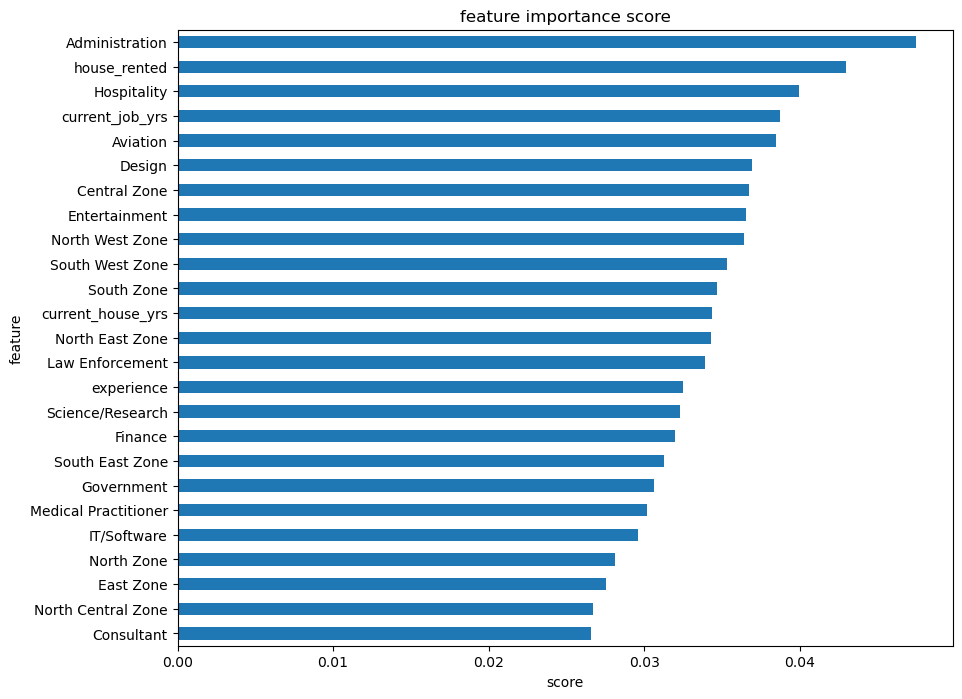

In [94]:
show_feature_importance(best_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Text(0.5, 1.0, 'SHAP Summary Plot for XGBoost')

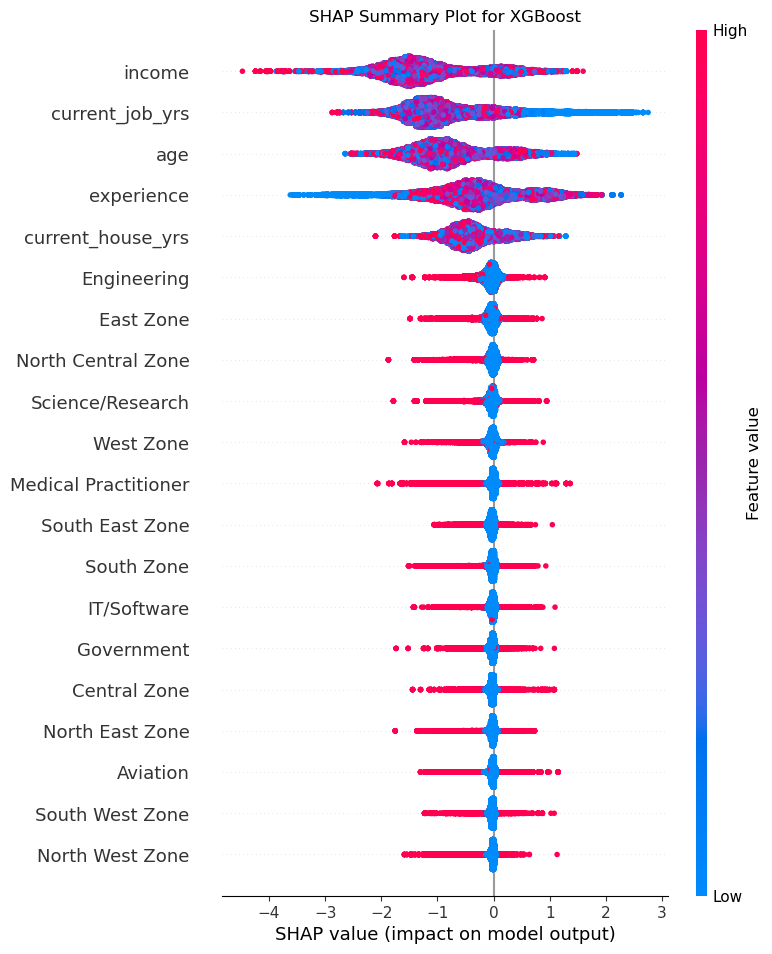

In [95]:
import shap

# Create a decision tree model with the optimal max_depth value
optimal_max_depth = 9  # You can change this based on your analysis
#best_xg2 = xg_hyp2
model = best_xg
model.fit(X_train, y_train)

# Create an explainer object for the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot for XGBoost")
plt.show()

In [96]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0],feature_names=X_test.columns)

In [97]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1],feature_names=X_test.columns)

##### Predict Proba

In [124]:
data_x = X_bt.reset_index()
data_x

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
0      210070   0.331 0.241       0.250            0.357              0.250                   0   
1      240594   0.240 0.552       0.400            0.429              0.750                   0   
2      215360   0.090 0.707       0.600            0.500              0.500                   0   
3      113821   0.924 0.707       0.900            0.357              0.250                   0   
4      127498   0.367 0.672       0.250            0.214              0.500                   0   
...       ...     ...   ...         ...              ...                ...                 ...   
47580  156075   0.997 0.690       0.150            0.214              0.500                   0   
47581   10576   0.482 0.517       0.300            0.429              0.750                   0   
47582   41481   0.131 0.552       0.200            0.286              1.000                   0   
47583  243698   0.603 0.259       0.900            0.929              0.000                   0   
47584  150477   0.045 0.414       0.150            0.214              1.000                   0   

       house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
0                0             1               0         0           0       0            1   
1                0             1               0         0           0       0            1   
2                0             1               0         0           0       0            0   
3                0             1               1         0           0       0            0   
4                0             1               0         1           0       0            0   
...            ...           ...             ...       ...         ...     ...          ...   
47580            0             1               0         0           0       0            1   
47581            0             1               0         0           0       0            0   
47582            0             1               0         0           0       0            1   
47583            0             1               0         0           0       0            0   
47584            0             1               0         0           0       0            0   

       Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
0                  0        0           0            0            0                0   
1                  0        0           0            0            0                0   
2                  0        0           1            0            0                0   
3                  0        0           0            0            0                0   
4                  0        0           0            0            0                0   
...              ...      ...         ...          ...          ...              ...   
47580              0        0           0            0            0                0   
47581              0        0           0            1            0                0   
47582              0        0           0            0            0                0   
47583              0        0           0            0            0                0   
47584              1        0           0            0            0                0   

       Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
0                         0                 0             0          0                   0   
1                         0                 0             0          0                   0   
2                         0                 0             0          0                   1   
3                         0                 0             0          0                   0   
4                         0                 0             0          0                   1   
...                     ...               ...           .

In [125]:
data_y = y_bt.reset_index()
data_y

index  risk_flag
0      210070      0.000
1      240594      0.000
2      215360      0.000
3      113821      0.000
4      127498      0.000
...       ...        ...
47580  156075      0.000
47581   10576      0.000
47582   41481      0.000
47583  243698      0.000
47584  150477      0.000

[47585 rows x 2 columns]

In [126]:
data = pd.merge(data_x, data_y, on="index")
data

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
0      210070   0.331 0.241       0.250            0.357              0.250                   0   
1      240594   0.240 0.552       0.400            0.429              0.750                   0   
2      215360   0.090 0.707       0.600            0.500              0.500                   0   
3      113821   0.924 0.707       0.900            0.357              0.250                   0   
4      127498   0.367 0.672       0.250            0.214              0.500                   0   
...       ...     ...   ...         ...              ...                ...                 ...   
47580  156075   0.997 0.690       0.150            0.214              0.500                   0   
47581   10576   0.482 0.517       0.300            0.429              0.750                   0   
47582   41481   0.131 0.552       0.200            0.286              1.000                   0   
47583  243698   0.603 0.259       0.900            0.929              0.000                   0   
47584  150477   0.045 0.414       0.150            0.214              1.000                   0   

       house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
0                0             1               0         0           0       0            1   
1                0             1               0         0           0       0            1   
2                0             1               0         0           0       0            0   
3                0             1               1         0           0       0            0   
4                0             1               0         1           0       0            0   
...            ...           ...             ...       ...         ...     ...          ...   
47580            0             1               0         0           0       0            1   
47581            0             1               0         0           0       0            0   
47582            0             1               0         0           0       0            1   
47583            0             1               0         0           0       0            0   
47584            0             1               0         0           0       0            0   

       Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
0                  0        0           0            0            0                0   
1                  0        0           0            0            0                0   
2                  0        0           1            0            0                0   
3                  0        0           0            0            0                0   
4                  0        0           0            0            0                0   
...              ...      ...         ...          ...          ...              ...   
47580              0        0           0            0            0                0   
47581              0        0           0            1            0                0   
47582              0        0           0            0            0                0   
47583              0        0           0            0            0                0   
47584              1        0           0            0            0                0   

       Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
0                         0                 0             0          0                   0   
1                         0                 0             0          0                   0   
2                         0                 0             0          0                   1   
3                         0                 0             0          0                   0   
4                         0                 0             0          0                   1   
...                     ...               ...           .

In [135]:
data['PD'] = best_xg.predict_proba(data[X_train.columns])[:,1]
data.head(10)

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
0  210070   0.331 0.241       0.250            0.357              0.250                   0   
1  240594   0.240 0.552       0.400            0.429              0.750                   0   
2  215360   0.090 0.707       0.600            0.500              0.500                   0   
3  113821   0.924 0.707       0.900            0.357              0.250                   0   
4  127498   0.367 0.672       0.250            0.214              0.500                   0   
5  180988   0.833 0.724       0.000            0.000              0.250                   0   
6  165347   0.801 0.776       0.350            0.429              0.500                   0   
7  198102   0.667 0.431       0.850            0.929              0.250                   0   
8    1498   0.706 0.328       0.500            0.714              0.750                   0   
9  186007   0.448 0.483       0.350            0.500              1.000                   0   

   house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
0            0             1               0         0           0       0            1   
1            0             1               0         0           0       0            1   
2            0             1               0         0           0       0            0   
3            0             1               1         0           0       0            0   
4            0             1               0         1           0       0            0   
5            0             1               0         0           0       0            1   
6            0             1               0         0           0       0            0   
7            0             1               0         0           0       0            1   
8            0             1               1         0           0       0            0   
9            0             1               0         0           0       0            0   

   Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
0              0        0           0            0            0                0   
1              0        0           0            0            0                0   
2              0        0           1            0            0                0   
3              0        0           0            0            0                0   
4              0        0           0            0            0                0   
5              0        0           0            0            0                0   
6              0        0           0            0            0                0   
7              0        0           0            0            0                0   
8              0        0           0            0            0                0   
9              0        0           0            0            0                1   

   Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
0                     0                 0             0          0                   0   
1                     0                 0             0          0                   0   
2                     0                 0             0          0                   1   
3                     0                 0             0          0                   0   
4                     0                 0             0          0                   1   
5                     0                 0             0          0                   1   
6                     0                 1             0          0                   0   
7                     0                 0             0          0                   0   
8                     0                 0             0          0                   0   
9                     0                 0             0          1                   0   

   North East Zone  North West Zone  Nor

In [ ]:
data['PD2'] = best_rf3.predict_proba(data[X_train.columns])[:,1]
data.head(10)

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
0  210070   0.331 0.241       0.250            0.357              0.250                   0   
1  240594   0.240 0.552       0.400            0.429              0.750                   0   
2  215360   0.090 0.707       0.600            0.500              0.500                   0   
3  113821   0.924 0.707       0.900            0.357              0.250                   0   
4  127498   0.367 0.672       0.250            0.214              0.500                   0   
5  180988   0.833 0.724       0.000            0.000              0.250                   0   
6  165347   0.801 0.776       0.350            0.429              0.500                   0   
7  198102   0.667 0.431       0.850            0.929              0.250                   0   
8    1498   0.706 0.328       0.500            0.714              0.750                   0   
9  186007   0.448 0.483       0.350            0.500              1.000                   0   

   house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
0            0             1               0         0           0       0            1   
1            0             1               0         0           0       0            1   
2            0             1               0         0           0       0            0   
3            0             1               1         0           0       0            0   
4            0             1               0         1           0       0            0   
5            0             1               0         0           0       0            1   
6            0             1               0         0           0       0            0   
7            0             1               0         0           0       0            1   
8            0             1               1         0           0       0            0   
9            0             1               0         0           0       0            0   

   Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
0              0        0           0            0            0                0   
1              0        0           0            0            0                0   
2              0        0           1            0            0                0   
3              0        0           0            0            0                0   
4              0        0           0            0            0                0   
5              0        0           0            0            0                0   
6              0        0           0            0            0                0   
7              0        0           0            0            0                0   
8              0        0           0            0            0                0   
9              0        0           0            0            0                1   

   Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
0                     0                 0             0          0                   0   
1                     0                 0             0          0                   0   
2                     0                 0             0          0                   1   
3                     0                 0             0          0                   0   
4                     0                 0             0          0                   1   
5                     0                 0             0          0                   1   
6                     0                 1             0          0                   0   
7                     0                 0             0          0                   0   
8                     0                 0             0          0                   0   
9                     0                 0             0          1                   0   

   North East Zone  North West Zone  Nor

In [154]:
cust1 = data[data['index']==198102]
cust1

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
7  198102   0.667 0.431       0.850            0.929              0.250                   0   

   house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
7            0             1               0         0           0       0            1   

   Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
7              0        0           0            0            0                0   

   Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
7                     0                 0             0          0                   0   

   North East Zone  North West Zone  North Zone  South East Zone  South West Zone  South Zone  \
7                0                0           0                0                1           0   

   West Zone  risk_flag    PD  
7          0      1.000 0.793

In [174]:
#Cust 1
df_clean2.loc[198102]

id                               198103
income                          6673726
age                                  46
experience                           17
married_single                   single
house_ownership                  rented
car_ownership                       yes
profession            Chemical_engineer
city                              Kochi
state                            Kerala
current_job_yrs                      13
current_house_yrs                    11
risk_flag                             1
experience_cat                      >15
age_cat                           36-49
income_cat                  c.5m - 7,5m
job_duration_cat                  10-14
segment_state           South West Zone
segment_profession          Engineering
Name: 198102, dtype: object

In [ ]:
### Test Score card
Income (1150872.50-6124010.00) = 36
age (33.5-66.5) = 38
exp (11.5-17.5) = 39
mar_stats (single) = 29
house_ownership (rented) = 28
car (yes) = 50
Current_job (>2.5)= 32
current house (<11.5) = 27
profession (Chemical_engineer) = 55
city (Kochi) = -114
state (Kerala)= 29

Actual : Risk = 0
total score: 249 (Risk = 1)
predicted : 0.793 (Risk = 1)

In [165]:
cust2 = data[data['index']==210070]
cust2

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
0  210070   0.331 0.241       0.250            0.357              0.250                   0   

   house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
0            0             1               0         0           0       0            1   

   Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
0              0        0           0            0            0                0   

   Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
0                     0                 0             0          0                   0   

   North East Zone  North West Zone  North Zone  South East Zone  South West Zone  South Zone  \
0                0                1           0                0                0           0   

   West Zone  risk_flag    PD  
0          0      0.000 0.002

In [173]:
#Cust 2
df_clean2.loc[210070]

id                             210071
income                        3319389
age                                35
experience                          5
married_single                 single
house_ownership                rented
car_ownership                     yes
profession            Design_Engineer
city                         Ludhiana
state                          Punjab
current_job_yrs                     5
current_house_yrs                  11
risk_flag                           0
experience_cat                    0-5
age_cat                         21-35
income_cat                b.2,5m - 5m
job_duration_cat                  4-6
segment_state         North West Zone
segment_profession        Engineering
Name: 210070, dtype: object

In [ ]:
Income (1150872.50-6124010.00) = 36
age (33.5-66.5) = 38
exp (2.5-5.5) = 24
mar_stats (single) = 29
house_ownership (rented) = 28
car (yes) = 50
Current_job (>2.5)= 32
current house (<11.5) = 27
profession (Designl_engineer) = 65
city (Ludhiana) = 40
state (Punjab)= 36

Actual : Risk = 0
scorecard: 378 (kalau threshold 600 Risk = 1)
predicted : 0.002 (Risk = 0)

In [170]:
cust3 = data[data['index']==200000]
cust3

Empty DataFrame
Columns: [index, income, age, experience, current_job_yrs, current_house_yrs, house_norent_noown, house_owned, house_rented, Administration, Aviation, Consultant, Design, Engineering, Entertainment, Finance, Government, Hospitality, IT/Software, Law Enforcement, Medical Practitioner, Science/Research, Central Zone, East Zone, North Central Zone, North East Zone, North West Zone, North Zone, South East Zone, South West Zone, South Zone, West Zone, risk_flag, PD]
Index: []

In [171]:
cust4 = data[data['index']==240594]
cust4

index  income   age  experience  current_job_yrs  current_house_yrs  house_norent_noown  \
1  240594   0.240 0.552       0.400            0.429              0.750                   0   

   house_owned  house_rented  Administration  Aviation  Consultant  Design  Engineering  \
1            0             1               0         0           0       0            1   

   Entertainment  Finance  Government  Hospitality  IT/Software  Law Enforcement  \
1              0        0           0            0            0                0   

   Medical Practitioner  Science/Research  Central Zone  East Zone  North Central Zone  \
1                     0                 0             0          0                   0   

   North East Zone  North West Zone  North Zone  South East Zone  South West Zone  South Zone  \
1                0                0           0                1                0           0   

   West Zone  risk_flag    PD  
1          0      0.000 0.023

In [172]:
#Cust 4
df_clean2.loc[240594]

id                                 240595
income                            2404413
age                                    53
experience                              8
married_single                     single
house_ownership                    rented
car_ownership                          no
profession            Industrial_Engineer
city                           Bhimavaram
state                      Andhra_Pradesh
current_job_yrs                         6
current_house_yrs                      13
risk_flag                               0
experience_cat                      06-10
age_cat                             50-64
income_cat                        a.<2,5m
job_duration_cat                      4-6
segment_state             South East Zone
segment_profession            Engineering
Name: 240594, dtype: object

In [ ]:
Income (1150872.50-6124010.00) = 36
age (33.5-66.5) = 38
exp (6.5-113.5) = 37
mar_stats (single) = 29
house_ownership (rented) = 28
car (no) = 29
Current_job (>2.5)= 32
current house (>11.5) = 36
profession (Design_engineer) = 65
city (Bhimavaram) = 111
state (Andhra_Pradesh)= 33

Actual : Risk = 0
scorecard: 474 (kalau threshold 600 Risk = 1)
predicted : 0.002 (Risk = 0)

### 2. Scorecard

#### Definisi Scorecard

Dikarenakan tidak ada nilai koefisien korelasi yang kuat antar fitur pada heatmap, maka digunakan Credit Scoring ( Scorecard ).
Credit Scoring mengacu pada penerapan model statistik untuk memberikan skor risiko pada suatu aplikasi kredit, dan ini merupakan bentuk Kecerdasan Buatan (Artificial Intelligence) berdasarkan pemodelan prediktif, yang menilai kemungkinan seorang pelanggan gagal membayar kewajiban kredit, menjadi tunggakan, atau pailit.

Selama bertahun-tahun, sejumlah teknik pemodelan yang berbeda untuk menerapkan Credit Scoring telah berkembang. Meskipun beragam, model Credit Scoring (Credit Scorecard) sangat menonjol dan digunakan oleh hampir 90% pengembang skor kredit. Sebagai kombinasi statistik dan pembelajaran mesin, skor dari model ini dapat langsung digunakan sebagai perkiraan probabilitas dan oleh karena itu memberikan masukan langsung untuk penetapan harga berdasarkan risiko.

https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b

#### Weight of Evidence (WOE) and Information Value (IV)
WoE (Weight of Evidence) mengukur kekuatan suatu atribut karakteristik dalam membedakan antara customer yang baik dan buruk, dan didasarkan pada proporsi applicant yang baik dibandingkan dengan applicant yang buruk pada setiap level grup.

Nilai negatif mengindikasikan bahwa pengelompokan tertentu mengisolasi proporsi applicant buruk lebih tinggi daripada applicant baik. Ini merupakan ukuran perbedaan antara proporsi applicant baik dan buruk dalam setiap atribut. Sebagai contoh, peluang seseorang dengan atribut tersebut menjadi baik atau buruk dan nilai WoE yang negatif lebih buruk dalam arti bahwa applicant dalam kelompok tersebut memiliki risiko kredit yang lebih besar.

https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b

In [ ]:
#============================================#
#            import dependencies             #
#============================================#

from monotonic_binning.monotonic_woe_binning import Binning
from optbinning import OptimalBinning
from optbinning import BinningProcess

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
import pandas as pd
import numpy as np
import optbinning as opt
from optbinning import Scorecard

(CVXPY) Sep 06 10:24:03 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 06 10:24:03 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
df_ori = df_clean.iloc[:, :-4].copy() # menghilangkan feature engineering age_cat cs, mengembalikan ke feature awal
df_ori.head()

id   income  age  experience married_single house_ownership car_ownership           profession             city           state  current_job_yrs  current_house_yrs  risk_flag
0   1  1303834   23           3         single          rented            no  Mechanical_engineer             Rewa  Madhya_Pradesh                3                 13          0
1   2  7574516   40          10         single          rented            no   Software_Developer         Parbhani     Maharashtra                9                 13          0
2   3  3991815   66           4        married          rented            no     Technical_writer        Alappuzha          Kerala                4                 10          0
3   4  6256451   41           2         single          rented           yes   Software_Developer      Bhubaneswar          Odisha                2                 12          1
4   5  5768871   47          11         single          rented            no        Civil_servant  Tiruchirappalli      Tamil_Nadu                3                 14          1

In [ ]:
df_scorecard = df_ori.copy() #diambil dari df_clean untuk menghindari kerancuan pada feature encoding
df_sample = df.copy()

df_scorecard = df_scorecard.reset_index(drop=False)
df_scorecard = df_scorecard.drop(columns=['index'])

df_sample = df_sample.reset_index(drop=False)
df_sample = df_sample.drop(columns=['index','experience_cat','age_cat','income_cat','job_duration_cat'])

In [ ]:
df_sample.head()

id   income  age  experience married_single house_ownership car_ownership           profession             city           state  current_job_yrs  current_house_yrs  risk_flag
0   1  1303834   23           3         single          rented            no  Mechanical_engineer             Rewa  Madhya_Pradesh                3                 13          0
1   2  7574516   40          10         single          rented            no   Software_Developer         Parbhani     Maharashtra                9                 13          0
2   3  3991815   66           4        married          rented            no     Technical_writer        Alappuzha          Kerala                4                 10          0
3   4  6256451   41           2         single          rented           yes   Software_Developer      Bhubaneswar          Odisha                2                 12          1
4   5  5768871   47          11         single          rented            no        Civil_servant  Tiruchirappalli      Tamil_Nadu                3                 14          1

In [ ]:
list_column_raw = list(df_sample.columns)
drop_column_bin =  ['id', 'risk_flag']

list_column = [i for i in list_column_raw if i not in drop_column_bin]

x_bin = df_sample[list_column]
y_bin = df_sample.risk_flag

### Apa Itu Binning?
**Binning**, juga dikenal sebagai diskritisasi atau pengelompokan, adalah teknik umum yang digunakan dalam pengembangan skor kredit (scorecard) dan model prediktif lainnya. Ini melibatkan membagi fitur numerik kontinu menjadi sejumlah interval diskrit atau bin. Proses ini diperlukan karena beberapa alasan, terutama saat mengembangkan skor kredit risiko:

1) Stabilitas dan Prediktabilitas: Binning membantu mengatasi masalah ketidakstabilan dan ketidakdugaan dalam model prediktif. Nilai-nilai yang jarang atau langka dapat menyebabkan ketidakstabilan, terutama ketika data tidak cukup untuk mengestimasi dampaknya dengan akurat. Binning mengelompokkan nilai-nilai serupa, mengurangi dampak kejadian langka dan meningkatkan stabilitas dan prediktabilitas model.

2) Hubungan Non-Linear: Dalam banyak kasus, hubungan antara variabel prediktor dan variabel target (misalnya, default atau non-default) tidak bersifat linear. Binning memungkinkan Anda untuk menangkap hubungan non-linear dengan membuat interval yang berbeda di mana tingkat respons (atau metrik relevan lainnya) bervariasi secara signifikan.

3) Mengurangi Overfitting: Binning dapat membantu mengurangi risiko overfitting. Overfitting terjadi ketika model belajar untuk berperforma baik pada data pelatihan tetapi gagal untuk menggeneralisasi ke data baru yang belum pernah dilihat sebelumnya. Dengan mengelompokkan nilai-nilai serupa bersama-sama, Anda mengurangi risiko model menangkap noise dan idiosinkrasi dalam data.

4) Interpretabilitas: Skor kredit sering digunakan dalam konteks di mana interpretabilitas penting, seperti dalam skor kredit. Binning dapat membuat skor kredit lebih mudah diinterpretasikan dengan menyediakan kategori yang jelas yang memiliki hubungan langsung dengan variabel target.

5) Penanganan Nilai Ekstrem: Nilai-nilai ekstrem dapat memiliki dampak yang tidak proporsional pada model, terutama dalam regresi linear. Binning membantu menangani nilai-nilai ekstrem dengan mengelompokkan nilai-nilai ekstrem ke dalam bin tertentu, mengurangi pengaruhnya pada model.

6) Persyaratan Regulasi: Dalam beberapa industri, persyaratan regulasi mungkin memerlukan penggunaan variabel yang telah di-binning untuk transparansi dan akuntabilitas dalam proses pemberian pinjaman dan penilaian risiko.

https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b

In [ ]:
#Start Binning for WoE
binning_fit_params = dict.fromkeys(list_column, {'monotonic_trend': 'auto_asc_desc',\
                                                  'min_n_bins':2, 'max_n_bins':10})  #value bin itu min=2, max=10

# 2) Instantiate class and fit to train dataset
binning_process    = BinningProcess(list_column, binning_fit_params=binning_fit_params)
binning_process.fit(x_bin, y_bin)

appended_data = []
for i in list_column:
    optb = binning_process.get_binned_variable(i)


    # 4) To visualize the results table and plot
    # store DataFrame in list
    data = optb.binning_table.build()
    data['features'] = i
    appended_data.append(data)
appended_data = pd.concat(appended_data)

features = binning_process.summary()[binning_process.summary()['selected'] == True]['name'].tolist()
woe = appended_data.copy()

woe['% of Event']     = np.maximum(woe['Event'], 0.5) / y_bin[y_bin == 1].shape[0]  # risk
woe['% of Non-event'] = np.maximum(woe['Non-event'], 0.5) / y_bin[y_bin == 0].shape[0] # non risk

# Transform Binning Value to WoE
# 3) To perform the binning of a dataset
data_transform = binning_process.transform(x_bin, metric='woe')
data_transform['risk_flag'] = df_sample['risk_flag'].copy()

# Nilai IV merupakan nilai sum dari IV setiap bin
summary_woe_iv = binning_process.summary()
woe_iv_sort = summary_woe_iv.sort_values('iv', ascending = False)
woe_qs_sort = summary_woe_iv.sort_values('quality_score', ascending = False)

# Tabulasi WOE berdasarkan iv
woe_iv_sort.head(10) # syntax display tabel WOE berdasarkan yang terbesar

BinningProcess(binning_fit_params={'age': {'max_n_bins': 10, 'min_n_bins': 2,
                                           'monotonic_trend': 'auto_asc_desc'},
                                   'car_ownership': {'max_n_bins': 10,
                                                     'min_n_bins': 2,
                                                     'monotonic_trend': 'auto_asc_desc'},
                                   'city': {'max_n_bins': 10, 'min_n_bins': 2,
                                            'monotonic_trend': 'auto_asc_desc'},
                                   'current_house_yrs': {'max_n_bins': 10,
                                                         'min_n_bins': 2,
                                                         'monotonic_trend': 'auto_asc_desc'...
                                                      'monotonic_trend': 'auto_asc_desc'},
                                   'profession': {'max_n_bins': 10,
                                                  'min_n_bins': 2,
                                                  'monotonic_trend': 'auto_asc_desc'},
                                   'state': {'max_n_bins': 10, 'min_n_bins': 2,
                                             'monotonic_trend': 'auto_asc_desc'}},
               variable_names=['income', 'age', 'experience', 'married_single',
                               'house_ownership', 'car_ownership', 'profession',
                               'city', 'state', 'current_job_yrs',
                               'current_house_yrs'])

name        dtype   status  selected n_bins    iv    js  gini quality_score
7             city  categorical  OPTIMAL      True     10 0.200 0.024 0.244         0.711
8            state  categorical  OPTIMAL      True     10 0.028 0.003 0.091         0.011
6       profession  categorical  OPTIMAL      True     10 0.026 0.003 0.090         0.050
2       experience    numerical  OPTIMAL      True      6 0.022 0.003 0.075         0.020
9  current_job_yrs    numerical  OPTIMAL      True      2 0.015 0.002 0.045         0.021
1              age    numerical  OPTIMAL      True      5 0.012 0.001 0.046         0.033
4  house_ownership  categorical  OPTIMAL      True      2 0.007 0.001 0.021         0.006
5    car_ownership  categorical  OPTIMAL      True      2 0.005 0.001 0.031         0.011
0           income    numerical  OPTIMAL      True      3 0.003 0.000 0.019         0.001
3   married_single  categorical  OPTIMAL      True      2 0.003 0.000 0.016         0.003

WOE IV value

< 0.02        = useless        
0.02 - 0.1    = weak           
0.1 - 0.3     = medium          
0.3 - 0.5     = strong           
'> 0.5         = suspicious

In [ ]:
binning_table = optb.binning_table

In [ ]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [ ]:
binning_table.build()

Bin   Count  Count (%)  Non-event  Event  Event rate    WoE    IV    JS
0       (-inf, 11.50)   95679      0.402      83677  12002       0.125 -0.028 0.000 0.000
1        [11.50, inf)  142246      0.598     125129  17117       0.120  0.019 0.000 0.000
2             Special       0      0.000          0      0       0.000  0.000 0.000 0.000
3             Missing       0      0.000          0      0       0.000  0.000 0.000 0.000
Totals                 237925      1.000     208806  29119       0.122        0.001 0.000

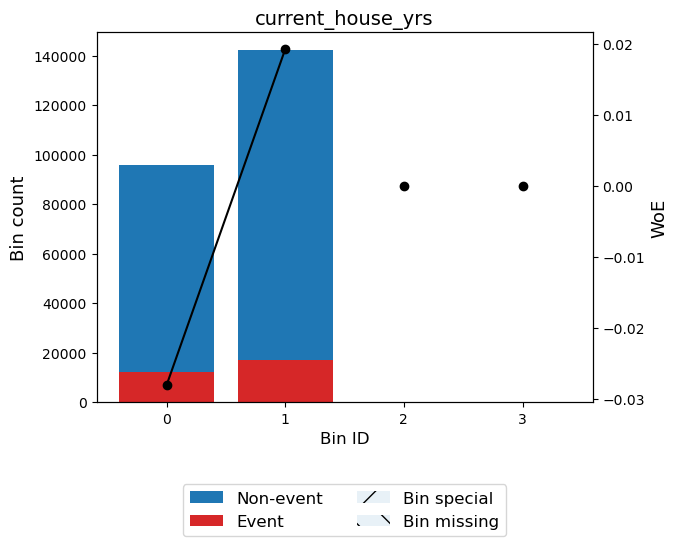

In [ ]:
binning_table.plot(metric="woe")

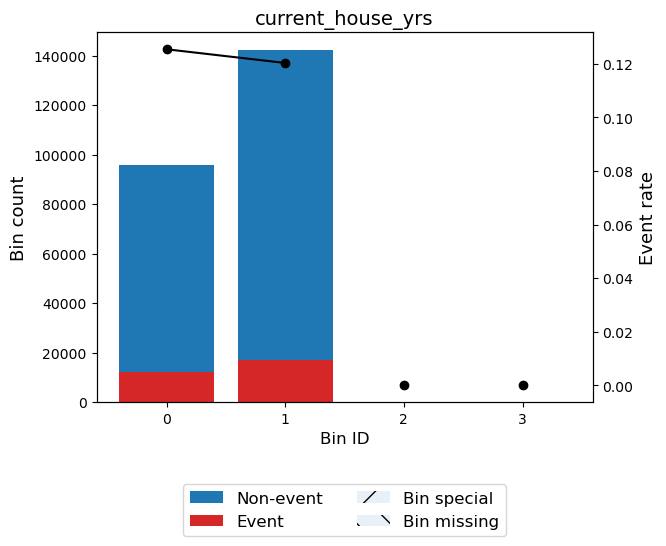

In [ ]:
binning_table.plot(metric="event_rate")

In [ ]:
woe_iv_sort.T

7            8            6           2                9          1                4              5          0               3                  10
name                  city        state   profession  experience  current_job_yrs        age  house_ownership  car_ownership     income  married_single  current_house_yrs
dtype          categorical  categorical  categorical   numerical        numerical  numerical      categorical    categorical  numerical     categorical          numerical
status             OPTIMAL      OPTIMAL      OPTIMAL     OPTIMAL          OPTIMAL    OPTIMAL          OPTIMAL        OPTIMAL    OPTIMAL         OPTIMAL            OPTIMAL
selected              True         True         True        True             True       True             True           True       True            True               True
n_bins                  10           10           10           6                2          5                2              2          3               2                  2
iv                   0.200        0.028        0.026       0.022            0.015      0.012            0.007          0.005      0.003           0.003              0.001
js                   0.024        0.003        0.003       0.003            0.002      0.001            0.001          0.001      0.000           0.000              0.000
gini                 0.244        0.091        0.090       0.075            0.045      0.046            0.021          0.031      0.019           0.016              0.011
quality_score        0.711        0.011        0.050       0.020            0.021      0.033            0.006          0.011      0.001           0.003              0.001

In [ ]:
# Event rate / WoE transformation

x_transform_woe = binning_process.transform(x_bin, metric='woe')
x_transform_event_rate = binning_process.transform(x_bin, metric="event_rate")
x_transform_indices = binning_process.transform(x_bin, metric="indices")
x_transform_bins = binning_process.transform(x_bin, metric="bins")

### Diskritisasi Prediktor/Pembuatan Kelompok

Pembuatan kelompok berarti proses mengubah karakteristik numerik menjadi kategorikal serta mengelompokkan ulang dan menggabungkan karakteristik kategorikal. Dalam proses pengembangan skor kartu (scorecard), mengapa pembuatan kelompok diperlukan? Alasannya adalah bahwa beberapa nilai karakteristik dapat jarang terjadi, dan akan menyebabkan ketidakstabilan jika tidak dikelompokkan bersama. Oleh karena itu, pengelompokan atribut yang serupa dengan kekuatan prediksi yang serupa akan meningkatkan akurasi skor kartu.

https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b

Sesuai data diatas, maka target akan head-to-head dengan Features.

### X_train, X_test, y_train, y_test

In [ ]:
from optbinning import Scorecard, BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold

# 1) Seleksi Fitur & Test Training Split

X = data_transform.drop(columns=['risk_flag'])
y = data_transform['risk_flag']

# data_transform = binning_process.transform(x_bin, metric='woe')
# data_transform['Risk_Flag'] = df_sample['Risk_Flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
X_train

income   age  experience  married_single  house_ownership  car_ownership  profession   city  state  current_job_yrs  current_house_yrs
134107   0.020 0.081      -0.285          -0.017           -0.023         -0.043      -0.117  0.227 -0.194           -0.285             -0.028
102221   0.023 0.034      -0.285          -0.017           -0.023         -0.043      -0.283  0.227  0.200           -0.285             -0.028
53954    0.023 0.081      -0.050          -0.017            0.299         -0.043      -0.160 -0.545  0.078            0.053              0.019
145543   0.023 0.034       0.029          -0.017           -0.023         -0.043      -0.117  0.668  0.200            0.053              0.019
197443   0.020 0.034      -0.050          -0.017           -0.023          0.107      -0.074  0.227  0.066            0.053              0.019
...        ...   ...         ...             ...              ...            ...         ...    ...    ...              ...                ...
119879  -0.156 0.034       0.029          -0.017           -0.023          0.107      -0.283 -0.371  0.066            0.053             -0.028
103694   0.023 0.081       0.044          -0.017           -0.023         -0.043       0.091  1.120  0.066            0.053             -0.028
131932  -0.156 0.034      -0.050          -0.017           -0.023         -0.043      -0.009  0.433  0.049            0.053              0.019
146867   0.023 0.034      -0.050          -0.017           -0.023          0.107      -0.283  0.433 -0.326            0.053              0.019
121958   0.020 0.081       0.044           0.163           -0.023         -0.043       0.091  0.433 -0.194            0.053             -0.028

[166547 rows x 11 columns]

### Logitic Regression

In [ ]:
# 2) LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', C=1)  #logisticRegression

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)  #kfold
model = lr_model

scoring =['accuracy','precision','recall','f1','roc_auc']                    #kfold score
scores = model_selection.cross_validate(model, X_train, y_train, cv=kfold,
                                      scoring=scoring, return_train_score=False)


In [ ]:
# 3) Feature importance

scores_df = pd.DataFrame(scores)
scores_df
scores_df.to_csv('kfold_credit_all_filtered.csv')

model.fit(X_train, y_train)

importance = model.coef_[0]
dict_importance = {'Feature':list(X_train.columns),'Coefficient':importance}
df_importance = pd.DataFrame(dict_importance)
df_importance = df_importance.sort_values('Coefficient', ascending=False)

NameError: ignored

In [ ]:
# Scores KFold CSV / Cross Validation

scores_df

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0    35.427       0.544          0.885           0.541        0.499    0.519         0.898
1    33.792       0.415          0.892           0.549        0.484    0.514         0.897
2    32.453       0.466          0.891           0.554        0.491    0.520         0.900
3    32.987       0.397          0.893           0.553        0.506    0.528         0.903
4    31.397       0.396          0.891           0.562        0.499    0.528         0.899
5    31.614       0.393          0.889           0.576        0.493    0.531         0.897
6    31.350       0.416          0.892           0.543        0.491    0.516         0.902
7    31.128       0.406          0.890           0.547        0.501    0.523         0.901
8    31.366       0.409          0.888           0.552        0.482    0.515         0.899
9    30.987       0.405          0.889           0.555        0.483    0.517         0.902

In [ ]:
kfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfoldkfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfold

Unnamed: 0  fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0           0    35.427       0.544          0.885           0.541        0.499    0.519         0.898
1           1    33.792       0.415          0.892           0.549        0.484    0.514         0.897
2           2    32.453       0.466          0.891           0.554        0.491    0.520         0.900
3           3    32.987       0.397          0.893           0.553        0.506    0.528         0.903
4           4    31.397       0.396          0.891           0.562        0.499    0.528         0.899
5           5    31.614       0.393          0.889           0.576        0.493    0.531         0.897
6           6    31.350       0.416          0.892           0.543        0.491    0.516         0.902
7           7    31.128       0.406          0.890           0.547        0.501    0.523         0.901
8           8    31.366       0.409          0.888           0.552        0.482    0.515         0.899
9           9    30.987       0.405          0.889           0.555        0.483    0.517         0.902

### Feature Importance Scorecard

In [ ]:
# 3) Feature importance

scores_df = pd.DataFrame(scores)
scores_df
scores_df.to_csv('kfold_credit_all_filtered.csv')

model.fit(X_train, y_train)

importance = model.coef_[0]
dict_importance = {'Feature':list(X_train.columns),'Coefficient':importance}
df_importance = pd.DataFrame(dict_importance)
df_importance = df_importance.sort_values('Coefficient', ascending=False)

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0     1.246       0.061          0.876           0.000        0.000    0.000         0.636
1     1.080       0.066          0.881           0.000        0.000    0.000         0.640
2     1.042       0.064          0.879           0.000        0.000    0.000         0.652
3     1.087       0.069          0.881           0.000        0.000    0.000         0.640
4     1.160       0.075          0.878           0.000        0.000    0.000         0.641
5     1.342       0.057          0.873           0.000        0.000    0.000         0.643
6     1.103       0.080          0.882           0.000        0.000    0.000         0.634
7     1.224       0.072          0.880           0.000        0.000    0.000         0.652
8     1.110       0.081          0.877           0.000        0.000    0.000         0.642
9     1.227       0.074          0.878           0.000        0.000    0.000         0.641

LogisticRegression(C=1)

In [ ]:
df_importance

Feature  Coefficient
9     current_job_yrs       -0.027
8               state       -0.032
2          experience       -0.820
1                 age       -0.886
5       car_ownership       -0.897
6          profession       -0.906
3      married_single       -0.962
4     house_ownership       -0.980
7                city       -1.007
0              income       -1.111
10  current_house_yrs       -1.192

In [ ]:
# Scores KFold CSV / Cross Validation

scores_df

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0     1.246       0.061          0.876           0.000        0.000    0.000         0.636
1     1.080       0.066          0.881           0.000        0.000    0.000         0.640
2     1.042       0.064          0.879           0.000        0.000    0.000         0.652
3     1.087       0.069          0.881           0.000        0.000    0.000         0.640
4     1.160       0.075          0.878           0.000        0.000    0.000         0.641
5     1.342       0.057          0.873           0.000        0.000    0.000         0.643
6     1.103       0.080          0.882           0.000        0.000    0.000         0.634
7     1.224       0.072          0.880           0.000        0.000    0.000         0.652
8     1.110       0.081          0.877           0.000        0.000    0.000         0.642
9     1.227       0.074          0.878           0.000        0.000    0.000         0.641

In [ ]:
kfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfoldkfold = pd.read_csv('kfold_credit_all_filtered.csv')
kfold

Unnamed: 0  fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc
0           0     1.246       0.061          0.876           0.000        0.000    0.000         0.636
1           1     1.080       0.066          0.881           0.000        0.000    0.000         0.640
2           2     1.042       0.064          0.879           0.000        0.000    0.000         0.652
3           3     1.087       0.069          0.881           0.000        0.000    0.000         0.640
4           4     1.160       0.075          0.878           0.000        0.000    0.000         0.641
5           5     1.342       0.057          0.873           0.000        0.000    0.000         0.643
6           6     1.103       0.080          0.882           0.000        0.000    0.000         0.634
7           7     1.224       0.072          0.880           0.000        0.000    0.000         0.652
8           8     1.110       0.081          0.877           0.000        0.000    0.000         0.642
9           9     1.227       0.074          0.878           0.000        0.000    0.000         0.641

### Scorecard

In [ ]:
pd.set_option('display.max_rows', None)

lr_model = LogisticRegression(solver='lbfgs', C=1)  # Large-scale Bound-constrained Optimization http://users.iems.northwestern.edu/~nocedal/lbfgsb.html

scorecard = Scorecard(binning_process=binning_process,
                      estimator=lr_model, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 800})
scorecard.fit(x_bin, y_bin)

scorecard = scorecard.table()
scorecard = scorecard.sort_values(by=['Variable', 'Points'], ascending=[True, False])

scorecard

Scorecard(binning_process=BinningProcess(binning_fit_params={'age': {'max_n_bins': 10,
                                                                     'min_n_bins': 2,
                                                                     'monotonic_trend': 'auto_asc_desc'},
                                                             'car_ownership': {'max_n_bins': 10,
                                                                               'min_n_bins': 2,
                                                                               'monotonic_trend': 'auto_asc_desc'},
                                                             'city': {'max_n_bins': 10,
                                                                      'min_n_bins': 2,
                                                                      'monotonic_trend': 'auto_asc_desc'},
                                                             'current_house_yrs': {'max_n_bins': 10,
                                                                                   'min_n_bins': 2,
                                                                                   'monoto...
                                                                            'monotonic_trend': 'auto_asc_desc'},
                                                             'state': {'max_n_bins': 10,
                                                                       'min_n_bins': 2,
                                                                       'monotonic_trend': 'auto_asc_desc'}},
                                         variable_names=['income', 'age',
                                                         'experience',
                                                         'married_single',
                                                         'house_ownership',
                                                         'car_ownership',
                                                         'profession', 'city',
                                                         'state',
                                                         'current_job_yrs',
                                                         'current_house_yrs']),
          estimator=LogisticRegression(C=1), scaling_method='min_max',
          scaling_method_params={'max': 800, 'min': 0})

Variable                                                Bin   Points
4                 age                                       [66.50, inf)   45.082
3                 age                                     [33.50, 66.50)   37.662
5                 age                                            Special   32.161
6                 age                                            Missing   32.161
2                 age                                     [29.50, 33.50)   15.965
1                 age                                     [26.50, 29.50)    3.250
0                 age                                      (-inf, 26.50)  -23.182
0       car_ownership                                              [yes]   49.968
2       car_ownership                                            Special   32.161
3       car_ownership                                            Missing   32.161
1       car_ownership                                               [no]   24.898
0                city  [Lucknow, Dehradun, Gandhinagar, Amritsar, Sul...  237.049
1                city  [Tiruvottiyur, Kumbakonam, Khora, Farrukhabad,...  154.300
2                city  [Unnao, Vellore, Kozhikode, Jodhpur, Shimoga, ...  111.322
3                city  [Loni, Guntakal, Srikakulam, Haridwar, Bihar, ...   73.655
4                city  [Chandigarh, Ludhiana, Aizawl, Sirsa, Faridaba...   40.268
10               city                                            Special   32.161
11               city                                            Missing   32.161
5                city  [Rajkot, Bhilai, Hajipur, Coimbatore, Madurai,...   15.688
6                city  [Salem, Ranchi, Saharanpur, Karawal, Solapur, ...   -6.842
7                city  [Bhiwandi, Berhampore, Khandwa, Pali, Miryalag...  -35.751
8                city  [Raipur, Kavali, Maheshtala, Haldia, Panipat, ...  -67.540
9                city  [Thiruvananthapuram, Mathura, Barasat, Bardham... -114.668
1   current_house_yrs                                       [11.50, inf)   35.625
2   current_house_yrs                                            Special   32.161
3   current_house_yrs                                            Missing   32.161
0   current_house_yrs                                      (-inf, 11.50)   27.101
0     current_job_yrs                                       (-inf, 2.50)   33.029
2     current_job_yrs                                            Special   32.161
3     current_job_yrs                                            Missing   32.161
1     current_job_yrs                                        [2.50, inf)   31.998
5          experience                                       [17.50, inf)   72.551
4          experience                                     [11.50, 17.50)   39.307
3          experience                                      [6.50, 11.50)   36.815
2          experience                                       [5.50, 6.50)   34.116
6          experience                                            Special   32.161
7          experience                                            Missing   32.161
1          experience                                       [2.50, 5.50)   24.155
0          experience                                       (-inf, 2.50)  -13.893
0     house_ownership                              [owned, norent_noown]   89.437
2     house_ownership                                            Special   32.161
3     house_ownership                                            Missing   32.161
1     house_ownership                                           [rented]   27.735
2              income                                  [6124010.00, inf)   36.637
1              income                           [1150872.50, 6124010.00)   36.206
3              income                                            Special   32.161
4              income                                            Missing   32.161
0              income                                 (-inf, 1150872.50)    1